<a href="https://colab.research.google.com/github/IMOKURI/signate-471/blob/main/%E5%8C%BB%E5%AD%A6%E8%AB%96%E6%96%87%E3%81%AE%E8%87%AA%E5%8B%95%E4%BB%95%E5%88%86%E3%81%91%E3%83%81%E3%83%A3%E3%83%AC%E3%83%B3%E3%82%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About this notebook ...

competition site: https://signate.jp/competitions/471







## ToDo

- [ ] pre train のモデルの save と load
- [ ] preprocess したデータの save と load (wandb)
- [ ] optune の seed 固定 https://book-read-yoshi.hatenablog.com/entry/2021/03/22/lightgbm_optuna_deterministic

### Idea

- [x] [ラベル判定結果の誤りに関するお知らせ](https://signate.jp/competitions/471/discussions/20210816152356-59) をとりこむ 
- [x] 分類で推論、回帰で推論
- [x] 回帰の場合の境界値の最適化
    - [x] second stage で学習べきかも
        - [ ] heamy という stacking のライブラリがある
        - [ ] CNN で stacking がいいかもしれない https://tawara.hatenablog.com/entry/2020/12/16/132415
            - 縦・横、チャネル数が、クラス数（１）・モデル数（ｎ）・１で、 1xn で畳み込む 
        - [x] lightGBM
    - [ ] Nelder-Mead 法 という最適化手法を調べる
- [ ] 最適な境界値はモデルによって異なるので、アンサンブルの時は、 vote ensemble がいいかもしれない
- [x] アブストで事前学習して、タイトルでメイン学習 https://www.kaggle.com/maunish/clrp-pytorch-roberta-pretrain
    - 事前学習は、Masked LM
- [x] タイトルだけで学習・推論
- [ ] タイトル + アブストで学習・推論
    - [ ] タイトルだけで推論したのとアンサンブルができる
    - [ ] Longformer がいいかもしれない `allenai/longformer-base-4096`
    - [ ] large モデルためす
- [ ] アブスト + タイトル で学習・推論
- [ ] アブストが空 or not でモデルわける
- [ ] アブストの max length 調整
    - [ ] 途中で切る。デフォルトの 512 はありそう。ほとんどのアブストがその長さで収まる
    - [ ] 要約する方法があるかなぁ
- [x] dropout を 0 にする
- [x] gradient cripping を 0.2 or 0.5 で試す
- [ ] re-initialization
    - This paper (https://arxiv.org/pdf/2006.05987.pdf) shows that fine-tuning with reinitialization last N layers works well.
    - Different models have different optimal N. Almost models set N=4~5, gpt2-models set N=6.
    - https://github.com/kurupical/commonlit/blob/8781139c8ed4cc59f7c7ac9d97c72c351ee91377/exp/exp502.py#L497
- [ ] Pre trained なレイヤーのfreeze https://raphaelb.org/posts/freezing-bert/
- [ ] Recall を伸ばすための loss function は考えられるか。 https://openreview.net/pdf?id=SlprFTIQP3
    - [x] f1 score を微分可能にして、 loss 関数に使うアプローチ https://gist.github.com/SuperShinyEyes/dcc68a08ff8b615442e3bc6a9b55a354 https://towardsdatascience.com/the-unknown-benefits-of-using-a-soft-f1-loss-in-classification-systems-753902c0105d
    - [ ] epoch ごとに beta の値を増やしていく epoch * 2 とか
- [ ] 出現する単語のクラスタリング
- [x] TF-IDF して、 リッジ回帰 → ベースライン2 でやった
    - IF-IDF の結果もBERTの特徴量にできないだろうか
    - https://www.kaggle.com/semyonkoshkarov/tf-idf-linearsvr-baseline も参考になるかも
- [ ] 医療用語で事前学習されたモデルを使ってみる
    - [x] BioBERT https://github.com/dmis-lab/biobert `dmis-lab/biobert-base-cased-v1.1` 286k downloads
        - [ ] large モデル試す
    - [ ] Med-BERT https://github.com/ZhiGroup/Med-BERT
        - 診断精度に貢献しているかもしれない(いや、一般的な話だったｗ) https://www.nature.com/articles/s41746-021-00455-y
    - [x] `microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext` 30.8k downloads https://www.axion.zone/microsoft-researchers-claim-state-of-the-art-biomedical-nlp-model/
    - [x] `bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12` 4.3k downloads https://github.com/ncbi-nlp/bluebert
        - [ ] large モデル試す
    - [x] `emilyalsentzer/Bio_ClinicalBERT` https://huggingface.co/emilyalsentzer/Bio_ClinicalBERT
    - [ ] `emilyalsentzer/Bio_Discharge_Summary_BERT` https://huggingface.co/emilyalsentzer/Bio_Discharge_Summary_BERT
    - [x] `lordtt13/COVID-SciBERT` https://huggingface.co/lordtt13/COVID-SciBERT
    - [x] `allenai/scibert_scivocab_uncased` https://huggingface.co/allenai/scibert_scivocab_uncased
- [ ] Augmentation https://neptune.ai/blog/data-augmentation-nlp
    - [ ] Back translation: 他言語に翻訳して、もう一回翻訳する（英語→フランス語→英語） https://qiita.com/nena0undefined/items/c2926bad07039e5540ab
        - [ ] ラベル 1 のだけやって、学習データに追加する
    - [ ] Synonym Replacement: 単語のいくつかを、同じ意味の別の単語に置き換える
        - [ ] 自然言語の augmentation ができるライブラリ https://github.com/makcedward/nlpaug
- [ ] TTA
- [ ] ベースラインのシンプルさを取り戻す。(思ったよりベースラインのスコアが良かったので、それを取り込む・・・）
    - [ ] weight decay を調整 0.01 or 0


### Experiments

- BERT でアブストの　pre train をしてもスコアは上がっていない（学習の方法を工夫した方がよいかも）
- BERT Large は title の学習には大きすぎて？ loss が Base モデルに及ばない。
- epoch 3 で val loss が下がらないので、 epoch 3 で aug かけるとかありかもしれない
- `dmis-lab/biobert-base-cased-v1.1` と `bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12` の成績がよい


## Prepare for Colab

In [1]:
!nvidia-smi

Sun Sep  5 00:32:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    24W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
import sys

if os.path.exists('init.txt'):
    print("Already initialized.")

else:
    if 'google.colab' in sys.modules:
        from google.colab import drive
        drive.mount('/content/drive')

        !cp /content/drive/MyDrive/Datasets/signate-471/train.csv .
        !cp /content/drive/MyDrive/Datasets/signate-471/test.csv .
        !cp /content/drive/MyDrive/Datasets/signate-471/sample_submit.csv .

    # for StratifiedGroupKFold
    # !pip uninstall -y scikit-learn
    # !pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn

    # for MultilabelStratifiedKFold
    !pip install -q iterative-stratification

    # !pip install -qU 'git+https://github.com/katsura-jp/pytorch-cosine-annealing-with-warmup'

    !pip install -q wandb
    !pip install -q optuna

    !pip install -q transformers
    !pip install -q textstat
    !pip install -q nlpaug

    # https://qiita.com/_yushuu/items/83c51e29771530646659
    # !pip install -q googletrans==4.0.0-rc1

    !touch init.txt

Already initialized.


In [3]:
# Install_LightGBM_with_GPU

if os.path.exists('init_lightgbm.txt'):
    print("Already initialized.")

else:
    ! git clone --recursive https://github.com/Microsoft/LightGBM

    %cd /content/LightGBM
    ! mkdir -p build

    %cd build
    ! cmake -DUSE_GPU=1 /content/LightGBM
    ! make -j$(nproc)
    ! sudo apt-get -y install python-pip
    ! sudo -H pip install setuptools numpy scipy scikit-learn -U
    ! sudo -H pip install pandas==1.3.0

    %cd /content/LightGBM/python-package
    ! sudo python setup.py install --precompile

    %cd /content/

    !touch init_lightgbm.txt

Already initialized.


## Library

In [4]:
import glob
import json
import math
import os
import random
import re
import time
import warnings
from contextlib import contextmanager

# import lightgbm as lgb
# import optuna.integration.lightgbm as lgb
import matplotlib.pyplot as plt
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nltk
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import textstat
import torch
import torch.nn as nn
import torch.nn.functional as F
import transformers as T
import wandb
# from cosine_annealing_warmup import CosineAnnealingWarmupRestarts
# from googletrans import Translator
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn.metrics import mean_squared_error, fbeta_score
from sklearn.model_selection import KFold, StratifiedKFold  # , StratifiedGroupKFold
from torch.optim import SGD, Adam  # , AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR, CosineAnnealingWarmRestarts, ReduceLROnPlateau
from torch.utils.data import DataLoader, Dataset
from tqdm.notebook import tqdm


In [5]:
warnings.filterwarnings("ignore")

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
netrc = "../input/wandbtoken/.netrc"

if 'google.colab' in sys.modules:
    netrc = "/content/drive/MyDrive/.netrc"

!cp -f {netrc} ~/

!wandb login

wandb: Currently logged in as: imokuri (use `wandb login --relogin` to force relogin)


In [9]:
wandb_job_type = ""
wandb_notes = ""
wandb_tags = []

## Load Data

In [10]:
DATA_DIR = "../input/signate-471/"
OUTPUT_DIR = "./"

if 'google.colab' in sys.modules:
    DATA_DIR = "./"

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [11]:
train = pd.read_csv(DATA_DIR + "train.csv")
test = pd.read_csv(DATA_DIR + "test.csv")
sub = pd.read_csv(DATA_DIR + "sample_submit.csv", header=None)
sub.columns = ["id", "judgement"]

## Config

In [12]:
class Config:
    wandb_entity = "ponkots"
    wandb_project = "signate-471"
    print_freq = 100

    pre_train = False
    train = False
    validate = False
    inference = False
    stack = True
    stack_optuna = True

    debug = False
    multi_gpu = False
    apex = False


In [13]:
if Config.stack_optuna:
    import optuna.integration.lightgbm as lgb
else:
    import lightgbm as lgb

In [14]:
if Config.pre_train:
    wandb_job_type = "pre_training"

elif Config.train:
    wandb_job_type = "training"

elif Config.inference:
    wandb_job_type = "inference"

elif Config.validate:
    wandb_job_type = "validation"

elif Config.stack:
    wandb_job_type = "stacking"

In [15]:
if Config.apex:
    from apex import amp

In [16]:
# seed = random.randrange(10000)
seed = 440

print(seed)

440


In [17]:
config_defaults = {
    "seed": seed,
    "input": "title_abstract",
    "max_len": 512,
    "border": "minimize",
    "n_class": 1,
    "n_fold": 5,
    "gradient_accumulation_steps": 2,
    "max_grad_norm": 1000,
    "num_workers": 4,
    "batch_size": 12,
    "epochs": 3,
    "optimizer": "BertAdamW",
    "scheduler": "get_cosine_schedule_with_warmup",
    "criterion": "BCEWithLogitsLoss",  # "FBetaLoss",  # "BCEWithLogitsLoss",
    "lr": 2e-5,
    "min_lr": 1e-5,
    "weight_decay": 0.01,
    "dropout": 0.1,
    "model_name": "",
    "reinit_layers": 0,
    "freeze_layers": 0,
    "best": "loss",  # "score",
    "inference_runs": [
        "3rnktuhs",
        "pnhvuu65",
    ],
}

In [18]:
if Config.stack:
    config_stack = {
        "objective": "binary" if config_defaults["n_class"] == 1 else "multiclass",
        "criterion": "binary_logloss" if config_defaults["n_class"] == 1 else "multi_logloss",
    }
    config_defaults.update(config_stack)

    if not Config.stack_optuna:
        config_stack_manual = {
            "lr": 0.01,
            "max_depth": 7,
            "num_leaves": 31,
            "min_data_in_leaf": 20,
            "dropout": 0.1,
        }
        config_defaults.update(config_stack_manual)


In [19]:
if not (Config.validate or Config.inference or Config.stack):
    config_defaults["inference_runs"] = []

In [20]:
if Config.debug:
    config_defaults["epochs"] = 1
    Config.print_freq = 10

In [21]:
if config_defaults["optimizer"] == "BertAdamW":
    config_defaults["lr_69"] = 5e-5
    config_defaults["lr_133"] = 1e-4

In [22]:
# Update by epoch
# num_steps = config_defaults["epochs"]

# Update by batch
num_data = 1000 if Config.debug else len(train)
num_steps = num_data // config_defaults["n_fold"] * (config_defaults["n_fold"] - 1) // config_defaults["batch_size"] // config_defaults["gradient_accumulation_steps"] * config_defaults["epochs"]

print(num_steps)

if config_defaults["scheduler"] == "CosineAnnealingWarmRestarts":
    config_defaults["T_0"] = num_steps

elif config_defaults["scheduler"] == "CosineAnnealingLR":
    config_defaults["T_max"] = num_steps

elif config_defaults["scheduler"] == "ReduceLROnPlateau":
    config_defaults["factor"] = 0.2
    config_defaults["patience"] = 4
    config_defaults["eps"] = 1e-6

elif config_defaults["scheduler"] == "CosineAnnealingWarmupRestarts":
    config_defaults["first_cycle_steps"] = num_steps
    config_defaults["warmup_steps"] = num_steps // 10

elif config_defaults["scheduler"] == "get_cosine_schedule_with_warmup":
    config_defaults["num_training_steps"] = num_steps
    config_defaults["num_warmup_steps"] = max(50, num_steps // 10)

2712


In [23]:
if Config.debug:
    run = wandb.init(entity=Config.wandb_entity, project=Config.wandb_project, config=config_defaults, mode="disabled")
else:
    run = wandb.init(entity=Config.wandb_entity, project=Config.wandb_project, config=config_defaults, notes=wandb_notes, tags=wandb_tags, job_type=wandb_job_type, save_code=True)

wandb: Currently logged in as: imokuri (use `wandb login --relogin` to force relogin)


In [24]:
config = wandb.config

## EDA-1

In [25]:
# アブストが空っぽのが結構ある
print(train.isnull().sum())
print(test.isnull().sum())

id              0
title           0
abstract     4390
judgement       0
dtype: int64
id             0
title          0
abstract    6546
dtype: int64


## Preprocessing

In [26]:
def preprocess(data):
    
    title_abstract = []
    for e in data:

        # アルファベット以外は空白に置換します。
        e = re.sub("[^a-zA-Z]", " ", e)

        # 小文字に変換します。
        e = e.lower()

        # token に分割します。
        e = nltk.word_tokenize(e)

        # stop word を削除します。
        e = [word for word in e if not word in set(nltk.corpus.stopwords.words("english"))]

        # 見出し語化します。
        lemma = nltk.WordNetLemmatizer()
        e = [lemma.lemmatize(word) for word in e]
        e = " ".join(e)

        title_abstract.append(e)

    return title_abstract

In [27]:
def back_translation_de(data):
    print("Back Translation (en -> de -> en)")
    title_abstract = []
    back_translation_aug = naw.BackTranslationAug(
        from_model_name='facebook/wmt19-en-de', 
        to_model_name='facebook/wmt19-de-en'
    )

    for e in tqdm(data, total=len(data)):
        try:
            title_abstract.append(back_translation_aug.augment(e))
        except Exception as e:
            print(e)
            title_abstract.append(e)

    return title_abstract

In [28]:
def synonym_augmenter(data):
    print("Synonym Augmenter")
    title_abstract = []
    aug = naw.SynonymAug(aug_src='wordnet')

    for e in tqdm(data, total=len(data)):
        try:
            title_abstract.append(aug.augment(e))
        except Exception as e:
            print(e)
            title_abstract.append(e)

    return title_abstract

In [29]:
def abstractive_summarization_augmenter(text):
    print("Abstractive Summarization Augmenter")
    aug = nas.AbstSummAug(model_path='t5-base', max_length=config.max_len, device='cuda')
    try:
        return aug.augment(text)
    except Exception as e:
        print(f"{e} ... {text}")
        return text

In [30]:
def get_train_data(train):

    # NaN を空白で埋めます。
    train = train.fillna("")

    # judgement を one hot encoding
    # train["judgement_str"] = train["judgement"].astype(str)
    # train = pd.get_dummies(train, columns=["judgement_str"], prefix=["judgement"])

    # abstract の有無を Stratified KFold で使います。
    train["nan_abstract"] = np.where(train["abstract"] == "", 1, 0)

    # title の単語数
    # train["len_title"] = train["title"].apply(lambda x: len(x.split()))

    # abstract の単語数
    # train["len_abstract"] = train["abstract"].apply(lambda x: len(x.split()))

    # title と abstract を接続します。
    train["title_abstract"] = train[["title", "abstract"]].agg(" ".join, axis=1)
    # train["abstract_title"] = train[["abstract", "title"]].agg(" ".join, axis=1)

    # Back Translation (en -> de -> en)
    #train_bt_de = train[train["judgement"] == 1].copy()
    #train_bt_de["title_abstract"] = back_translation_de(train_bt_de["title_abstract"])

    # Synonym Augmenter
    #train_sa = train[train["judgement"] == 1].copy()
    #train_sa["title_abstract"] = synonym_augmenter(train_sa["title_abstract"])

    #train = pd.concat([train, train_bt_de, train_sa], axis=0)

    train["len_input"] = train[config.input].apply(lambda x: len(x.split()))

    # Abstractive Summarization Augmenter
    #train.loc[train['len_input'] > config.max_len, config.input] = train.loc[train['len_input'] > config.max_len, config.input].apply(abstractive_summarization_augmenter)
    #train["len_input"] = train[config.input].apply(lambda x: len(x.split()))


    # train["preprocessed_title_abstract"] = preprocess(train["title_abstract"])

    # 前処理した文の単語数
    # train["len_preprocessed_title_abstract"] = train["preprocessed_title_abstract"].apply(lambda x: len(x.split()))

    return train

In [31]:
def get_test_data(test):

    # NaN を空白で埋めます。
    test = test.fillna("")

    # title の単語数
    # test["len_title"] = test["title"].apply(lambda x: len(x.split()))

    # abstract の単語数
    # test["len_abstract"] = test["abstract"].apply(lambda x: len(x.split()))

    # title と abstract を接続します。
    test["title_abstract"] = test[["title", "abstract"]].agg(" ".join, axis=1)
    # test["abstract_title"] = test[["abstract", "title"]].agg(" ".join, axis=1)

    test["len_input"] = test[config.input].apply(lambda x: len(x.split()))

    # Abstractive Summarization Augmenter
    #test.loc[test['len_input'] > config.max_len, config.input] = test.loc[test['len_input'] > config.max_len, config.input].apply(abstractive_summarization_augmenter)
    #test["len_input"] = test[config.input].apply(lambda x: len(x.split()))


    # test["preprocessed_title_abstract"] = preprocess(test["title_abstract"])

    # 前処理した文の単語数
    # test["len_preprocessed_title_abstract"] = test["preprocessed_title_abstract"].apply(lambda x: len(x.split()))

    return test

In [32]:
if os.path.exists("/content/drive/MyDrive/Datasets/signate-471/preprocessed_train.csv"):
    !cp -f /content/drive/MyDrive/Datasets/signate-471/preprocessed_train.csv .
    train = pd.read_csv("preprocessed_train.csv")

    # csv を再読み込みすると NaN に戻ってしまうので、再度変換します。
    train = train.fillna("")

else:
    # 一度、前処理したものは保存しておきます。
    train = get_train_data(train)
    train.to_csv("preprocessed_train.csv")

    # artifact = wandb.Artifact('preprocessed_train', type='dataset')
    # artifact.add_file("preprocessed_train.csv")
    # run.log_artifact(artifact)

    !cp -f preprocessed_train.csv /content/drive/MyDrive/Datasets/signate-471/

In [33]:
if os.path.exists("/content/drive/MyDrive/Datasets/signate-471/preprocessed_test.csv"):
    !cp -f /content/drive/MyDrive/Datasets/signate-471/preprocessed_test.csv .
    test = pd.read_csv("preprocessed_test.csv")

    # csv を再読み込みすると NaN に戻ってしまうので、再度変換します。
    test = test.fillna("")

else:
    # 一度、前処理したものは保存しておきます。
    test = get_test_data(test)
    test.to_csv("preprocessed_test.csv")

    # artifact = wandb.Artifact('preprocessed_test', type='dataset')
    # artifact.add_file("preprocessed_test.csv")
    # run.log_artifact(artifact)

    !cp -f preprocessed_test.csv /content/drive/MyDrive/Datasets/signate-471/

## EDA-2

In [34]:
# abstract に改行は含まれていない
print(len(train[train["abstract"].str.contains("\n")]))
print(len(test[test["abstract"].str.contains("\n")]))

0
0


In [35]:
# input の単語数
print(train["len_input"].max())
print(test["len_input"].max())

1537
1457


In [36]:
for ds in [train, test, sub]:
    print(f"=" * 80)
    ds.info()
    display(ds.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27145 entries, 0 to 27144
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      27145 non-null  int64 
 1   id              27145 non-null  int64 
 2   title           27145 non-null  object
 3   abstract        27145 non-null  object
 4   judgement       27145 non-null  int64 
 5   nan_abstract    27145 non-null  int64 
 6   title_abstract  27145 non-null  object
 7   len_input       27145 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.7+ MB


,Unnamed: 0,id,title,abstract,judgement,nan_abstract,title_abstract,len_input
0,0,0,One-year age changes in MRI brain volumes in o...,Longitudinal studies indicate that declines in...,0,0,One-year age changes in MRI brain volumes in o...,203
1,1,1,Supportive CSF biomarker evidence to enhance t...,The present study was undertaken to validate t...,0,0,Supportive CSF biomarker evidence to enhance t...,237
2,2,2,Occurrence of basal ganglia germ cell tumors w...,Objective: To report a case series in which ba...,0,0,Occurrence of basal ganglia germ cell tumors w...,143
3,3,3,New developments in diagnosis and therapy of C...,The etiology and pathogenesis of idiopathic ch...,0,0,New developments in diagnosis and therapy of C...,387
4,4,4,Prolonged shedding of SARS-CoV-2 in an elderly...,,0,1,Prolonged shedding of SARS-CoV-2 in an elderly...,16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40834 entries, 0 to 40833
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      40834 non-null  int64 
 1   id              40834 non-null  int64 
 2   title           40834 non-null  object
 3   abstract        40834 non-null  object
 4   title_abstract  40834 non-null  object
 5   len_input       40834 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.9+ MB


,Unnamed: 0,id,title,abstract,title_abstract,len_input
0,0,27145,Estimating the potential effects of COVID-19 p...,The objective of the paper is to analyse chang...,Estimating the potential effects of COVID-19 p...,261
1,1,27146,Leukoerythroblastic reaction in a patient with...,,Leukoerythroblastic reaction in a patient with...,8
2,2,27147,[15O]-water PET and intraoperative brain mappi...,[15O]-water PET was performed on 12 patients w...,[15O]-water PET and intraoperative brain mappi...,329
3,3,27148,Adaptive image segmentation for robust measure...,We present a method that significantly improve...,Adaptive image segmentation for robust measure...,130
4,4,27149,Comparison of Epidemiological Variations in CO...,The objective of this study is to compare the ...,Comparison of Epidemiological Variations in CO...,237


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40834 entries, 0 to 40833
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         40834 non-null  int64
 1   judgement  40834 non-null  int64
dtypes: int64(2)
memory usage: 638.2 KB


,id,judgement
0,27145,0
1,27146,1
2,27147,1
3,27148,0
4,27149,1


### 目的変数 judgement の分布

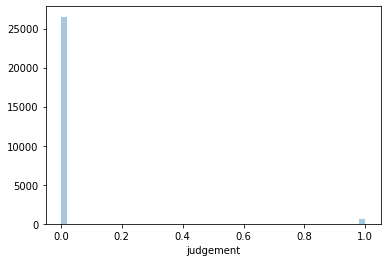

In [37]:
sns.distplot(train["judgement"], kde=False)

In [38]:
train["judgement"].value_counts()

0    26515
1      630
Name: judgement, dtype: int64

In [39]:
border = len(train[train["judgement"] == 1]) / len(train["judgement"])
print(border)

0.0232086940504697


### input の単語数の分布

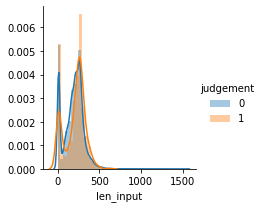

In [40]:
g = sns.FacetGrid(train[["judgement", "len_input"]], hue='judgement')
g.map(sns.distplot, 'len_input', label='judgement', hist=True, rug=False)
g.add_legend()

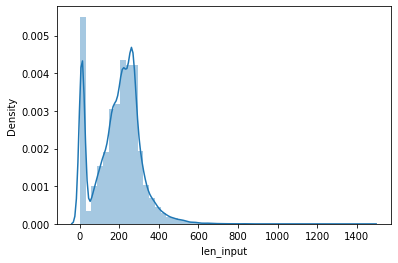

In [41]:
sns.distplot(test["len_input"], hist=True, rug=False)

## Load Models

In [42]:
if Config.validate:
    api = wandb.Api()

    for n, run_id in enumerate(config.inference_runs):
        if not os.path.exists(run_id):
            os.makedirs(run_id)

        run_path = f"{Config.wandb_entity}/{Config.wandb_project}/{run_id}"
        run = api.run(run_path)

        try:
            run.file("oof_df.csv").download(run_id)
        except wandb.CommError:
            # Already downloaded.
            pass

        oof = pd.read_csv(f"{run_id}/oof_df.csv")[["id", "preds"]]
        oof.columns = ["id", f"preds{n}"]
        train = pd.merge(train, oof, on="id")
    
    print(train.columns)

In [43]:
if Config.inference:
    api = wandb.Api()
    inference_models = []

    for n, run_id in enumerate(config.inference_runs):
        if not os.path.exists(run_id):
            os.makedirs(run_id)

        run_path = f"{Config.wandb_entity}/{Config.wandb_project}/{run_id}"
        run = api.run(run_path)

        inference_model = {}
        inference_model["run_id"] = run_id
        inference_model["model_name"] = run.config["model_name"]

        for fold in range(config.n_fold):
            try:
                run.file(f"{inference_model['model_name'].replace('/', '-')}_fold{fold}_best.pth").download(run_id)
            except wandb.CommError:
                # Already downloaded.
                pass

            model_preds = torch.load(f"{run_id}/{inference_model['model_name'].replace('/', '-')}_fold{fold}_best.pth")
            inference_model[f"state_fold{fold}"] = model_preds["model"]
            inference_model[f"preds_fold{fold}"] = model_preds["preds"]

        inference_models.append(inference_model)
    
    print({m['run_id']: m['model_name'] for m in inference_models})

In [44]:
if Config.stack:
    api = wandb.Api()

    feat_id = 0
    for n, run_id in enumerate(config.inference_runs):
        if not os.path.exists(run_id):
            os.makedirs(run_id)

        run_path = f"{Config.wandb_entity}/{Config.wandb_project}/{run_id}"
        run = api.run(run_path)

        try:
            run.file("validation_df.csv").download(run_id)
        except wandb.CommError:
            # Already downloaded.
            pass

        try:
            run.file("prediction_df.csv").download(run_id)
        except wandb.CommError:
            # Already downloaded.
            pass

        val = pd.read_csv(f"{run_id}/validation_df.csv")
        pred = pd.read_csv(f"{run_id}/prediction_df.csv")

        # cols = [c for c in val.columns if c.startswith("preds") and c != "preds"]
        cols = [c for c in val.columns if c.startswith("class_preds")]
        val = val[["id"] + cols]
        pred = pred[["id"] + cols]

        adjust_cols = ["id"] + [f"preds{n}" for n in range(feat_id, feat_id + len(cols))]
        val.columns = adjust_cols
        pred.columns = adjust_cols

        feat_id += len(cols)

        train = pd.merge(train, val, on="id")
        test = pd.merge(test, pred, on="id")
    
    print(f"train: {train.columns}")
    print(f"test: {test.columns}")

train: Index(['Unnamed: 0', 'id', 'title', 'abstract', 'judgement', 'nan_abstract',
       'title_abstract', 'len_input', 'preds0', 'preds1', 'preds2', 'preds3',
       'preds4'],
      dtype='object')
test: Index(['Unnamed: 0', 'id', 'title', 'abstract', 'title_abstract', 'len_input',
       'preds0', 'preds1', 'preds2', 'preds3', 'preds4'],
      dtype='object')


In [45]:
if Config.debug and not Config.stack:
    train = train.sample(n=1000, random_state=config.seed).reset_index(drop=True)
    test = test.sample(n=1000, random_state=config.seed).reset_index(drop=True)
    sub = sub.sample(n=1000, random_state=config.seed).reset_index(drop=True)

## CV Split

In [46]:
Fold = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for n, (train_index, val_index) in enumerate(Fold.split(train, train[["judgement", "nan_abstract"]])):
    train.loc[val_index, "fold"] = int(n)
train["fold"] = train["fold"].astype(np.uint8)
print(train.groupby(["fold", "judgement", "nan_abstract"]).size())

fold  judgement  nan_abstract
0     0          0               4455
                 1                848
      1          0                198
                 1                 54
1     0          0               4453
                 1                850
      1          0                200
                 1                 52
2     0          0               4446
                 1                857
      1          0                207
                 1                 45
3     0          0               4445
                 1                858
      1          0                208
                 1                 44
4     0          0               4446
                 1                857
      1          0                207
                 1                 45
dtype: int64


## Utils

In [47]:
@contextmanager
def timer(name):
    t0 = time.time()
    LOGGER.info(f"[{name}] start")
    yield
    LOGGER.info(f"[{name}] done in {time.time() - t0:.0f} s.")


def init_logger(log_file=OUTPUT_DIR + "train.log"):
    from logging import INFO, FileHandler, Formatter, StreamHandler, getLogger

    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=log_file)
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger


LOGGER = init_logger()


def seed_torch(seed=42):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True


seed_torch(seed=config.seed)


## Dataset

In [48]:
class BaseDataset(Dataset):
    def __init__(self, df, model_name, include_labels=True):
        tokenizer = T.AutoTokenizer.from_pretrained(model_name)

        self.df = df
        self.include_labels = include_labels

        self.title = df[config.input].tolist()
        self.encoded = tokenizer.batch_encode_plus(
            self.title,
            padding = 'max_length',            
            max_length = config.max_len,
            truncation = True,
            return_attention_mask=True
        )
        
        if self.include_labels:
            self.labels = df["judgement"].values

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        input_ids = torch.tensor(self.encoded['input_ids'][idx])
        attention_mask = torch.tensor(self.encoded['attention_mask'][idx])

        if self.include_labels:
            label = torch.tensor(self.labels[idx]).float()
            return input_ids, attention_mask, label

        return input_ids, attention_mask


In [49]:
# Test

if config.model_name != "":

    train_ds = BaseDataset(train, config.model_name)

    for i in range(1):
        input_ids, attention_mask, label = train_ds[i]
        print(input_ids)
        print(attention_mask)
        print(f"label: {label}")


## Model

### BaseModel

In [50]:
if config.model_name != "":
    print(T.AutoConfig.from_pretrained(config.model_name))

In [51]:
class BaseModel(nn.Module):
    def __init__(self, model_name):
        super().__init__()

        if "base" in model_name or "L-12" in model_name or "scibert" in model_name:
            out_dim = 768
        elif "large" in model_name or "L-24" in model_name:
            out_dim = 1024

        auto_config = T.AutoConfig.from_pretrained(model_name)
        auto_config.update({
            "output_hidden_states": True,
            "hidden_dropout_prob": config.dropout,
            # "layer_norm_eps": 1e-7,
        })
        
        self.auto_model = T.AutoModel.from_pretrained(model_name, config=auto_config)  

        self.attention = nn.Sequential(
            nn.Linear(out_dim, 512),            
            nn.Tanh(),                       
            nn.Linear(512, 1),
            nn.Softmax(dim=1)
        )        

        self.regressor = nn.Sequential(
            nn.Linear(out_dim, 1)                        
        )

        if config.reinit_layers > 0:
            self.re_init()

        if config.freeze_layers > 0:
            self.freeze()

    def forward(self, input_ids, attention_mask):
        bert_output = self.auto_model(input_ids=input_ids, attention_mask=attention_mask)        

        # There are a total of 13 layers of hidden states.
        # 1 for the embedding layer, and 12 for the 12 Roberta layers.
        # We take the hidden states from the last Roberta layer.
        last_layer_hidden_states = bert_output.hidden_states[-1]

        # The number of cells is config.max_len.
        # The size of the hidden state of each cell is 768 (for roberta-base).
        # In order to condense hidden states of all cells to a context vector,
        # we compute a weighted average of the hidden states of all cells.
        # We compute the weight of each cell, using the attention neural network.
        weights = self.attention(last_layer_hidden_states)
                
        # weights.shape is config.batch_size x config.max_len x 1
        # last_layer_hidden_states.shape is config.batch_size x config.max_len x 768        
        # Now we compute context_vector as the weighted average.
        # context_vector.shape is config.batch_size x 768
        context_vector = torch.sum(weights * last_layer_hidden_states, dim=1)        
        
        # Now we reduce the context vector to the prediction score.
        out = self.regressor(context_vector).squeeze()

        return out

    def re_init(self):
        # re-init pooler
        self.auto_model.pooler.dense.weight.data.normal_(mean=0.0, std=self.auto_model.config.initializer_range)
        self.auto_model.pooler.dense.bias.data.zero_()
        for p in self.auto_model.pooler.parameters():
            p.requires_grad = True

        # re-init encoder
        layers = self.auto_model.encoder.layer[-config.reinit_layers:]
        for layer in layers:
            for module in layer.modules():
                if isinstance(module, nn.Linear):
                    # Slightly different from the TF version which uses truncated_normal for initialization
                    # cf https://github.com/pytorch/pytorch/pull/5617
                    module.weight.data.normal_(mean=0.0, std=self.auto_model.config.initializer_range)
                    if module.bias is not None:
                        module.bias.data.zero_()
                elif isinstance(module, nn.Embedding):
                    module.weight.data.normal_(mean=0.0, std=self.auto_model.config.initializer_range)
                    if module.padding_idx is not None:
                        module.weight.data[module.padding_idx].zero_()
                elif isinstance(module, nn.LayerNorm):
                    module.bias.data.zero_()
                    module.weight.data.fill_(1.0)

    def freeze(self):
        # freeze embedding
        for param in self.auto_model.embeddings.parameters():
            param.requires_grad = False

        # freeze encoder
        layers = self.auto_model.encoder.layer[:config.freeze_layers]
        for layer in layers:
            for param in layer.parameters():
                param.requires_grad = False

In [52]:
# Test

if config.model_name != "":

    model = BaseModel(config.model_name)
    print(model)

    train_dataset = BaseDataset(train, config.model_name)
    train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4, drop_last=True)

    for input_ids, attention_mask, labels in train_loader:
        output = model(input_ids, attention_mask)
        print(output)
        break


In [53]:
# Test

if config.model_name != "":
    for n, (name, tensor) in enumerate(list(model.named_parameters())):
        print(f"{n:>4}: {tensor.requires_grad}, {name}")

### StackingModel

## Optimizer

In [54]:
def bert_optimizer(model):
    named_parameters = list(model.named_parameters())    
    
    if "albert-base" in config.model_name:
        bert_parameters = named_parameters[:23]    
        attention_parameters = named_parameters[25:29]
        regressor_parameters = named_parameters[29:]
        second_block = 999
        third_block = 999

    elif "base" in config.model_name or "L-12" in config.model_name or "scibert" in config.model_name:
        bert_parameters = named_parameters[:197]    
        attention_parameters = named_parameters[199:203]
        regressor_parameters = named_parameters[203:]
        second_block = 69
        third_block = 133

    elif "large" in config.model_name or "L-24" in config.model_name:
        bert_parameters = named_parameters[:388]    
        attention_parameters = named_parameters[391:395]
        regressor_parameters = named_parameters[395:]
        second_block = 133
        third_block = 261
        
    attention_group = [params for (name, params) in attention_parameters]
    regressor_group = [params for (name, params) in regressor_parameters]

    parameters = []
    parameters.append({"params": attention_group})
    parameters.append({"params": regressor_group})

    for layer_num, (name, params) in enumerate(bert_parameters):
        weight_decay = 0.0 if "bias" in name else config.weight_decay

        lr = config.lr

        if layer_num >= second_block:        
            lr = config.lr_69

        if layer_num >= third_block:
            lr = config.lr_133

        parameters.append({"params": params, "weight_decay": weight_decay, "lr": lr})

    return T.AdamW(parameters)


## Loss

In [55]:
class RMSELoss(nn.Module):
    def __init__(self, eps=1e-7):
        super().__init__()
        self.mse = nn.MSELoss()
        self.eps = eps
        
    def forward(self, yhat, y):
        loss = torch.sqrt(self.mse(yhat, y) + self.eps)
        return loss

In [56]:
# https://gist.github.com/SuperShinyEyes/dcc68a08ff8b615442e3bc6a9b55a354
class FBetaLoss(nn.Module):

    def __init__(self, beta=1.0, epsilon=1e-7):
        super().__init__()
        self.beta = beta
        self.epsilon = epsilon
        
    def forward(self, y_pred, y_true):
        tp = (y_true * y_pred).sum(dim=0).to(torch.float32)
        tn = ((1 - y_true) * (1 - y_pred)).sum(dim=0).to(torch.float32)
        fp = ((1 - y_true) * y_pred).sum(dim=0).to(torch.float32)
        fn = (y_true * (1 - y_pred)).sum(dim=0).to(torch.float32)

        precision = tp / (tp + fp + self.epsilon)
        recall = tp / (tp + fn + self.epsilon)

        beta_squared = self.beta ** 2
        fbeta = (1 + beta_squared) * precision * recall / (beta_squared * precision + recall + self.epsilon)
        fbeta = fbeta.clamp(min=self.epsilon, max=1-self.epsilon)
        return 1 - fbeta.mean()

## Scoring

In [57]:
def get_score(y_true, y_pred, b=border):
    y_pred = np.where(y_pred < b, 0, 1)
    return fbeta_score(y_true, y_pred, beta=7.0)

In [58]:
def get_result(result_df, fold=config.n_fold):
    preds = result_df["preds"].values
    labels = result_df["judgement"].values
    score = get_score(labels, preds)
    LOGGER.info(f"Score: {score:<.5f}")
    # wandb.log({"fold": fold, "CV": score})
    if fold == config.n_fold:
        wandb.run.summary[f"CV"] = score
    else:
        wandb.run.summary[f"CV_fold{fold}"] = score


In [59]:
def determine_border(b, y_true, y_pred):
    return -1 * get_score(y_true, y_pred, b)


## Helper functions

In [60]:
class AverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return "%dm %ds" % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return "%s (remain %s)" % (asMinutes(s), asMinutes(rs))

In [61]:
def pre_train_fn():
    tokenizer = T.AutoTokenizer.from_pretrained(config.model_name)
    model = T.AutoModelForMaskedLM.from_pretrained(config.model_name)

    tokenizer.save_pretrained(f"./pretrained_{config.model_name}")

    train_dataset = T.LineByLineTextDataset(tokenizer=tokenizer, file_path="abstracts.txt", block_size=512)
    valid_dataset = T.LineByLineTextDataset(tokenizer=tokenizer, file_path="abstracts.txt", block_size=512)

    data_collator = T.DataCollatorForLanguageModeling(
        tokenizer=tokenizer, mlm=True, mlm_probability=0.15
    )

    training_args = T.TrainingArguments(
        output_dir = f"./pretrained_{config.model_name}_chk",
        overwrite_output_dir = True,
        num_train_epochs = 5,
        per_device_train_batch_size = 4,
        per_device_eval_batch_size = 4,
        gradient_accumulation_steps = 4,
        evaluation_strategy = 'steps',
        save_total_limit = 2,
        eval_steps = 105,
        save_steps = 105,
        metric_for_best_model = 'eval_loss',
        greater_is_better = False,
        load_best_model_at_end = True,
        prediction_loss_only = True,
        report_to = "wandb",
    )

    trainer = T.Trainer(
        model=model,
        args=training_args,
        data_collator=data_collator,
        train_dataset=train_dataset,
        eval_dataset=valid_dataset,
    )

    trainer.train()

    trainer.save_model(f"./pretrained_{config.model_name}")

In [62]:
def train_fn(train_loader, model, criterion, optimizer, epoch, scheduler, device):
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    scores = AverageMeter()

    # switch to train mode
    model.train()
    start = end = time.time()
    global_step = 0
    optimizer.zero_grad()

    for step, (input_ids, attention_mask, labels) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)

        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)

        y_preds = model(input_ids, attention_mask)

        loss = criterion(y_preds, labels)

        # record loss
        losses.update(loss.item(), batch_size)
        if config.gradient_accumulation_steps > 1:
            loss = loss / config.gradient_accumulation_steps
            
        if Config.apex:
            with amp.scale_loss(loss, optimizer) as scaled_loss:
                scaled_loss.backward()
        else:
            loss.backward()

        grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), config.max_grad_norm)

        if (step + 1) % config.gradient_accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()

            if isinstance(scheduler, ReduceLROnPlateau):
                scheduler.step(avg_val_loss)
            else:
                scheduler.step()
            
            global_step += 1

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if step % Config.print_freq == 0 or step == (len(train_loader) - 1):
            print(
                f"Epoch: [{epoch + 1}][{step}/{len(train_loader)}] "
                f"Elapsed {timeSince(start, float(step + 1) / len(train_loader)):s} "
                f"Loss: {losses.avg:.4f} "
                f"Grad: {grad_norm:.4f} "
                # f"LR: {scheduler.get_last_lr()[0]:.6f}  "
                f"LR: {scheduler.get_lr()[0]:.6f}  "
            )

    return losses.avg

In [63]:
def valid_fn(valid_loader, model, criterion, device):
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    scores = AverageMeter()

    # switch to evaluation mode
    model.eval()
    preds = []
    start = end = time.time()

    for step, (input_ids, attention_mask, labels) in enumerate(valid_loader):
        # measure data loading time
        data_time.update(time.time() - end)

        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)

        # compute loss
        with torch.no_grad():
            y_preds = model(input_ids, attention_mask)

        loss = criterion(y_preds, labels)
        losses.update(loss.item(), batch_size)

        # record score
        # preds.append(y_preds.softmax(1).to("cpu").numpy())
        preds.append(y_preds.to("cpu").numpy())
        if config.gradient_accumulation_steps > 1:
            loss = loss / config.gradient_accumulation_steps

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if step % Config.print_freq == 0 or step == (len(valid_loader) - 1):
            print(
                f"EVAL: [{step}/{len(valid_loader)}] "
                f"Elapsed {timeSince(start, float(step + 1) / len(valid_loader)):s} "
                f"Loss: {losses.avg:.4f} "
            )
    predictions = np.concatenate(preds)
    return losses.avg, predictions

In [64]:
def inference():
    predictions = sub.copy()

    for n, model_item in enumerate(inference_models):
        test_dataset = BaseDataset(test, model_item['model_name'], include_labels=False)
        test_loader = DataLoader(
            test_dataset, batch_size=config.batch_size, shuffle=False, num_workers=config.num_workers, pin_memory=True
        )

        preds = []
        for fold in range(config.n_fold):
            LOGGER.info(f"========== ID: {model_item['run_id']} model: {model_item['model_name']} fold: {fold} inference ==========")
            model = BaseModel(model_item['model_name'])
            model.to(device)
            model.load_state_dict(model_item[f"state_fold{fold}"])
            model.eval()
            fold_preds = []
            for i, (input_ids, attention_mask) in tqdm(enumerate(test_loader), total=len(test_loader)):
                input_ids = input_ids.to(device)
                attention_mask = attention_mask.to(device)
                with torch.no_grad():
                    y_preds = model(input_ids, attention_mask)
                # avg_preds.append(y_preds.softmax(1).to("cpu").numpy())
                fold_preds.append(y_preds.to("cpu").numpy())
            preds.append(np.concatenate(fold_preds))

        preds = np.mean(preds, axis=0)

        if config.criterion == "BCEWithLogitsLoss":
            preds = 1 / (1 + np.exp(-preds))

        predictions[f"preds{n}"] = preds

    return predictions

In [65]:
def stacking_inference():
    feature_cols = [col for col in test.columns if col.startswith("preds")]
    # predictions = sub.copy()

    preds = []
    for fold in range(config.n_fold):
        LOGGER.info(f"========== fold: {fold} inference ==========")
        bst = lgb.Booster(model_file=OUTPUT_DIR + f"lgb_fold{fold}_best.txt")
        fold_preds = bst.predict(test[feature_cols])
        preds.append(fold_preds)

    preds = np.mean(preds, axis=0)
    # predictions[f"preds"] = preds

    return preds

## Train loop

In [66]:
def train_loop(df, fold):

    LOGGER.info(f"========== fold: {fold} training ==========")

    # ====================================================
    # Data Loader
    # ====================================================
    trn_idx = df[df["fold"] != fold].index
    val_idx = df[df["fold"] == fold].index

    train_folds = df.loc[trn_idx].reset_index(drop=True)
    valid_folds = df.loc[val_idx].reset_index(drop=True)

    train_dataset = BaseDataset(train_folds, config.model_name)
    valid_dataset = BaseDataset(valid_folds, config.model_name)

    train_loader = DataLoader(
        train_dataset,
        batch_size=config.batch_size,
        shuffle=True,
        num_workers=config.num_workers,
        pin_memory=True,
        drop_last=True,
    )
    valid_loader = DataLoader(
        valid_dataset,
        batch_size=config.batch_size,
        shuffle=False,
        num_workers=config.num_workers,
        pin_memory=True,
        drop_last=False,
    )

    # ====================================================
    # Optimizer
    # ====================================================
    def get_optimizer(model):
        if config.optimizer == "Adam":
            optimizer = Adam(model.parameters(), lr=config.lr, weight_decay=config.weight_decay, amsgrad=False)
        elif config.optimizer == "AdamW":
            optimizer = T.AdamW(model.parameters(), lr=config.lr, weight_decay=config.weight_decay)
        elif config.optimizer == "BertAdamW":
            optimizer = bert_optimizer(model)
        return optimizer

    # ====================================================
    # Scheduler
    # ====================================================
    def get_scheduler(optimizer):
        if config.scheduler == "ReduceLROnPlateau":
            scheduler = ReduceLROnPlateau(
                optimizer, mode="min", factor=config.factor, patience=config.patience, verbose=True, eps=config.eps
            )
        elif config.scheduler == "CosineAnnealingLR":
            scheduler = CosineAnnealingLR(optimizer, T_max=config.T_max, eta_min=config.min_lr, last_epoch=-1)
        elif config.scheduler == "CosineAnnealingWarmRestarts":
            scheduler = CosineAnnealingWarmRestarts(
                optimizer, T_0=config.T_0, T_mult=1, eta_min=config.min_lr, last_epoch=-1
            )
        elif config.scheduler == "CosineAnnealingWarmupRestarts":
            scheduler = CosineAnnealingWarmupRestarts(
                optimizer, first_cycle_steps=config.first_cycle_steps, max_lr=config.lr, min_lr=config.min_lr, warmup_steps=config.warmup_steps
            )
        elif config.scheduler == "get_cosine_schedule_with_warmup":
            scheduler = T.get_cosine_schedule_with_warmup(
                optimizer,
                num_training_steps=config.num_training_steps, 
                num_warmup_steps=config.num_warmup_steps
            )
        return scheduler

    # ====================================================
    # Model
    # ====================================================
    model = BaseModel(config.model_name)
    model.to(device)

    # Use multi GPU
    if device == torch.device("cuda") and not Config.apex and Config.multi_gpu:
        model = torch.nn.DataParallel(model)  # make parallel
        # torch.backends.cudnn.benchmark=True

    optimizer = get_optimizer(model)
    scheduler = get_scheduler(optimizer)

    # ====================================================
    # Apex
    # ====================================================
    if Config.apex:
        model, optimizer = amp.initialize(model, optimizer, opt_level="O1", verbosity=0)

    # ====================================================
    # Criterion
    # ====================================================
    def get_criterion():
        if config.criterion == "CrossEntropyLoss":
            criterion = nn.CrossEntropyLoss()
        elif config.criterion == "BCEWithLogitsLoss":
            criterion = nn.BCEWithLogitsLoss()
        elif config.criterion == "MSELoss":
            criterion = nn.MSELoss()
        elif config.criterion == "RMSELoss":
            criterion = RMSELoss()
        elif config.criterion == "FBetaLoss":
            criterion = FBetaLoss(7.0)

        return criterion

    criterion = get_criterion()

    # ====================================================
    # Loop
    # ====================================================
    best_score = -1
    best_loss = np.inf

    # if not Config.multi_gpu:
    #     wandb.watch(model, log_freq=Config.print_freq)

    for epoch in range(config.epochs):

        start_time = time.time()

        # train
        avg_loss = train_fn(train_loader, model, criterion, optimizer, epoch, scheduler, device)

        # eval
        avg_val_loss, preds = valid_fn(valid_loader, model, criterion, device)
        valid_labels = valid_folds["judgement"].values

        # if isinstance(scheduler, ReduceLROnPlateau):
        #     scheduler.step(avg_val_loss)
        # else:
        #     scheduler.step()

        if config.criterion == "BCEWithLogitsLoss":
            preds = 1 / (1 + np.exp(-preds))

        # scoring
        # score = get_score(valid_labels, preds.argmax(1))
        score = get_score(valid_labels, preds)

        elapsed = time.time() - start_time

        LOGGER.info(
            f"Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f}  avg_val_loss: {avg_val_loss:.4f}  time: {elapsed:.0f}s"
        )
        LOGGER.info(f"Epoch {epoch+1} - Score: {score}")

        wandb.log(
            {
                "epoch": epoch + 1,
                f"loss/train_fold{fold}": avg_loss,
                f"loss/val_fold{fold}": avg_val_loss,
                f"score/fold{fold}": score,
            }
        )

        if (
            (config.best == "score" and score > best_score)
            or (config.best == "loss" and avg_val_loss < best_loss)
        ):
            best_score = score
            best_loss = avg_val_loss

            LOGGER.info(f"Epoch {epoch+1} - Save Best Score: {best_score:.4f} Model (Loss: {best_loss:.4f})")
            wandb.run.summary[f"loss_fold{fold}"] = score

            torch.save(
                {"model": model.state_dict(), "preds": preds}, OUTPUT_DIR + f"{config.model_name.replace('/', '-')}_fold{fold}_best.pth"
            )
            wandb.save(OUTPUT_DIR + f"{config.model_name.replace('/', '-')}_fold{fold}_best.pth")

        # if epoch == config.epochs - 1:
        #     LOGGER.info(f"Epoch {epoch+1} - Save final model")
        #     torch.save(
        #         {"model": model.state_dict(), "preds": preds}, OUTPUT_DIR + f"{config.model_name}_fold{fold}_final.pth"
        #     )

    check_point = torch.load(OUTPUT_DIR + f"{config.model_name.replace('/', '-')}_fold{fold}_best.pth")

    if config.n_class == 1:
        valid_folds["preds"] = preds
    else:
        valid_folds[[str(c) for c in range(config.n_class)]] = preds
        valid_folds["preds"] = preds.argmax(1)

    return valid_folds

## Stack loop

In [67]:
def stack_loop(df, fold):

    LOGGER.info(f"========== fold: {fold} training ==========")
    start_time = time.time()

    # ====================================================
    # Dataset
    # ====================================================
    trn_idx = df[df["fold"] != fold].index
    val_idx = df[df["fold"] == fold].index

    train_folds = df.loc[trn_idx].reset_index(drop=True)
    valid_folds = df.loc[val_idx].reset_index(drop=True)

    feature_cols = [col for col in df.columns if col.startswith("preds")]
    label_cols = ["judgement"]

    train_dataset = lgb.Dataset(data=train_folds[feature_cols], label=train_folds[label_cols], free_raw_data=False)
    valid_dataset = lgb.Dataset(data=valid_folds[feature_cols], label=valid_folds[label_cols], free_raw_data=False)

    # ====================================================
    # Parameters
    # ====================================================

    lgb_params = {
        "objective": config.objective,
        "metric": config.criterion,
        "num_class": config.n_class,
        "device_type": "gpu" if torch.cuda.is_available() else "cpu",
        "seed": seed + fold,
        "verbosity": -1,
    }

    if not Config.stack_optuna:
        lgb_params_manual = {
            "learning_rate": config.lr,
            "max_depth": config.max_depth,
            "num_leaves": config.num_leaves,
            "min_data_in_leaf": config.min_data_in_leaf,
            "drop_rate": config.dropout,
        }
        lgb_params.update(lgb_params_manual)

    # ====================================================
    # Loop
    # ====================================================

    evaluation_results = {}
    clf = lgb.train(
        params=lgb_params,
        train_set=train_dataset,
        num_boost_round=10000,
        valid_sets=[train_dataset, valid_dataset], 
        valid_names=['train', 'eval'],
        early_stopping_rounds=100,
        evals_result=evaluation_results,
        verbose_eval=100,
    )

    importances = pd.DataFrame({
        'features': clf.feature_name(),
        'importance': clf.feature_importance()
    }).sort_values('importance', ascending=False)

    preds = clf.predict(valid_folds[feature_cols], num_iteration=clf.best_iteration)
    valid_labels = valid_folds["judgement"].values

    if Config.stack_optuna:
        LOGGER.info(f"Best Params {fold} - {clf.params}")

    # scoring
    if config.n_class == 1:
        score = get_score(valid_labels, preds)
    else:
        score = get_score(valid_labels, preds.argmax(1))

    elapsed = time.time() - start_time

    LOGGER.info(f"Result {fold} - Score: {score}, time: {elapsed:.0f}s")

    LOGGER.info(f"Result {fold} - Save Best Model")
    # wandb.run.summary[f"loss_fold{fold}"] = score

    clf.save_model(OUTPUT_DIR + f"lgb_fold{fold}_best.txt", clf.best_iteration)
    wandb.save(OUTPUT_DIR + f"lgb_fold{fold}_best.txt")

    if config.n_class == 1:
        valid_folds["preds"] = preds
    else:
        valid_folds[[str(c) for c in range(config.n_class)]] = preds
        valid_folds["preds"] = preds.argmax(1)

    return valid_folds

## Main


In [68]:
def main():
    # ====================================================
    # Pre Training
    # ====================================================
    if Config.pre_train:
        abstract_df = pd.concat([train["abstract"], test["abstract"]])
        abstracts  = '\n'.join(abstract_df.tolist())
        with open("abstracts.txt", "w") as f:
            f.write(abstracts)

        pre_train_fn()

    # ====================================================
    # Training
    # ====================================================
    if Config.train:
        oof_df = pd.DataFrame()
        for fold in range(config.n_fold):
            seed_torch(seed + fold)

            _oof_df = train_loop(train, fold)
            oof_df = pd.concat([oof_df, _oof_df])
            LOGGER.info(f"========== fold: {fold} result ==========")
            get_result(_oof_df, fold)
            
        # CV result
        LOGGER.info(f"========== CV ==========")
        get_result(oof_df)
        
        # save result
        oof_df.to_csv(OUTPUT_DIR + "oof_df.csv", index=False)
        wandb.save(OUTPUT_DIR + "oof_df.csv")

    # ====================================================
    # Validation
    # ====================================================
    if Config.validate:
        probs = []
        borders = []
        class_cols = []

        for n in range(len(config.inference_runs)):
            probs.append(train[f"preds{n}"].values)

            if config.border == "minimize":
                res = sp.optimize.minimize_scalar(
                    determine_border,
                    method='bounded',
                    bounds=(0, 1),
                    args=(train["judgement"].values, train[f"preds{n}"].values)
                )
                b = res.x

                # CV result
                LOGGER.info(f"========== Border Optimization ==========")
                LOGGER.info(f"Border: {b:<.5f}, Score: {-res.fun:<.5f}")

            else:
                raise f"Invalid config.border parameter: {config.border}"

            borders.append(b)
            class_cols.append(f"class_preds{n}")
            train[f"class_preds{n}"] = np.where(train[f"preds{n}"].values < b, 0, 1)

        train["voting"] = train[class_cols].sum(axis=1)
        train["preds"] = np.where(train["voting"].values < len(config.inference_runs) / 2, 0, 1)

        LOGGER.info(f"========== CV ==========")
        get_result(train)

        # save result
        train.to_csv(OUTPUT_DIR + "validation_df.csv", index=False)
        wandb.save(OUTPUT_DIR + "validation_df.csv")

    # ====================================================
    # Inference
    # ====================================================
    if Config.inference:
        prediction_df = inference()

        probs = []
        for n in range(len(config.inference_runs)):
            probs.append(prediction_df[f"preds{n}"].values)

            prediction_df[f"class_preds{n}"] = np.where(prediction_df[f"preds{n}"].values < borders[n], 0, 1)

        prediction_df["voting"] = prediction_df[class_cols].sum(axis=1)
        prediction_df["preds"] = np.where(prediction_df["voting"].values < len(config.inference_runs) / 2, 0, 1)

        # submission
        sub["judgement"] = prediction_df["preds"]  # .argmax(1)
        print(sub["judgement"].value_counts())

        sub.to_csv(OUTPUT_DIR + "submission.csv", index=False, header=False)
        wandb.save(OUTPUT_DIR + "submission.csv")

        prediction_df.to_csv(OUTPUT_DIR + "prediction_df.csv", index=False)
        wandb.save(OUTPUT_DIR + "prediction_df.csv")
        
    # ====================================================
    # Stack
    # ====================================================
    if Config.stack:
        # Training
        oof_df = pd.DataFrame()
        for fold in range(config.n_fold):
            seed_torch(seed + fold)

            _oof_df = stack_loop(train, fold)
            oof_df = pd.concat([oof_df, _oof_df])
            LOGGER.info(f"========== fold: {fold} result ==========")
            get_result(_oof_df, fold)

        # CV result
        if config.n_class > 1 or config.border == "fixed":
            # CV result
            LOGGER.info(f"========== CV ==========")
            get_result(oof_df)
            b = border

        elif config.border == "minimize":
            res = sp.optimize.minimize_scalar(determine_border, method='bounded', bounds=(0, 1), args=(oof_df["judgement"].values, oof_df["preds"].values))
            LOGGER.info(f"========== CV: Border Optimization ==========")
            LOGGER.info(f"Border: {res.x:<.5f}, Score: {-res.fun:<.5f}")
            wandb.run.summary[f"CV"] = -res.fun
            b = res.x

        if config.n_class == 1:
            wandb.run.summary[f"border"] = b

        # save result
        oof_df.to_csv(OUTPUT_DIR + "stacking_oof_df.csv", index=False)
        wandb.save(OUTPUT_DIR + "stacking_oof_df.csv")

        # Inference
        preds = stacking_inference()

        if config.n_class == 1:
            predictions = np.where(preds < b, 0, 1)
        else:
            predictions = preds.argmax(1)

        # submission
        sub["judgement"] = predictions
        print(sub["judgement"].value_counts())

        sub.to_csv(OUTPUT_DIR + "submission.csv", index=False, header=False)
        wandb.save(OUTPUT_DIR + "submission.csv")

        if config.n_class == 1:
            sub["preds"] = preds
        else:
            sub[[str(c) for c in range(config.n_class)]] = preds
            sub["preds"] = preds.argmax(1)

        sub.to_csv(OUTPUT_DIR + "stacking_prediction_df.csv", index=False)
        wandb.save(OUTPUT_DIR + "stacking_prediction_df.csv")

In [69]:
if __name__ == "__main__":
    main()

========== fold: 0 training ==========
[I 2021-09-05 00:34:23,672] A new study created in memory with name: no-name-03584455-a6cc-4806-b9d0-1862a72360b3
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457292	eval's binary_logloss: 0.0485148
Early stopping, best iteration is:
[91]	train's binary_logloss: 0.0457544	eval's binary_logloss: 0.0484996


feature_fraction, val_score: 0.048500:  14%|#4        | 1/7 [00:00<00:01,  3.06it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0449107	eval's binary_logloss: 0.0477719
[200]	train's binary_logloss: 0.0447769	eval's binary_logloss: 0.0476542
[300]	train's binary_logloss: 0.0447465	eval's binary_logloss: 0.0476627
[400]	train's binary_logloss: 0.0447216	eval's binary_logloss: 0.0476102
[500]	train's binary_logloss: 0.0447089	eval's binary_logloss: 0.0476055
[600]	train's binary_logloss: 0.0446975	eval's binary_logloss: 0.047581
[700]	train's binary_logloss: 0.0446902	eval's binary_logloss: 0.0475639
[800]	train's binary_logloss: 0.0446824	eval's binary_logloss: 0.0475584
[900]	train's binary_logloss: 0.0446765	eval's binary_logloss: 0.0475482
Early stopping, best iteration is:
[894]	train's binary_logloss: 0.0446767	eval's binary_logloss: 0.0475435


feature_fraction, val_score: 0.047543:  29%|##8       | 2/7 [00:01<00:04,  1.21it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856


feature_fraction, val_score: 0.047486:  43%|####2     | 3/7 [00:01<00:02,  1.69it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446563	eval's binary_logloss: 0.0475103


feature_fraction, val_score: 0.047486:  57%|#####7    | 4/7 [00:02<00:01,  1.94it/s]

[200]	train's binary_logloss: 0.0446368	eval's binary_logloss: 0.0475004
Early stopping, best iteration is:
[119]	train's binary_logloss: 0.0446419	eval's binary_logloss: 0.0474971
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0449107	eval's binary_logloss: 0.0477719
[200]	train's binary_logloss: 0.0447769	eval's binary_logloss: 0.0476542
[300]	train's binary_logloss: 0.0447465	eval's binary_logloss: 0.0476627
[400]	train's binary_logloss: 0.0447216	eval's binary_logloss: 0.0476102
[500]	train's binary_logloss: 0.0447089	eval's binary_logloss: 0.0476055
[600]	train's binary_logloss: 0.0446975	eval's binary_logloss: 0.047581
[700]	train's binary_logloss: 0.0446902	eval's binary_logloss: 0.0475639
[800]	train's binary_logloss: 0.0446824	eval's binary_logloss: 0.0475584
[900]	train's binary_logloss: 0.0446765	eval's binary_logloss: 0.0475482


feature_fraction, val_score: 0.047486:  71%|#######1  | 5/7 [00:03<00:01,  1.36it/s]

Early stopping, best iteration is:
[894]	train's binary_logloss: 0.0446767	eval's binary_logloss: 0.0475435
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.047486:  86%|########5 | 6/7 [00:03<00:00,  1.69it/s]

[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446563	eval's binary_logloss: 0.0475103


feature_fraction, val_score: 0.047486: 100%|##########| 7/7 [00:04<00:00,  1.73it/s]


[200]	train's binary_logloss: 0.0446368	eval's binary_logloss: 0.0475004
Early stopping, best iteration is:
[119]	train's binary_logloss: 0.0446419	eval's binary_logloss: 0.0474971


num_leaves, val_score: 0.047486:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856


num_leaves, val_score: 0.047486:   5%|5         | 1/20 [00:00<00:06,  3.16it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856


num_leaves, val_score: 0.047486:  10%|#         | 2/20 [00:00<00:05,  3.15it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856


num_leaves, val_score: 0.047486:  15%|#5        | 3/20 [00:00<00:05,  3.17it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856


num_leaves, val_score: 0.047486:  20%|##        | 4/20 [00:01<00:04,  3.21it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856


num_leaves, val_score: 0.047486:  25%|##5       | 5/20 [00:01<00:04,  3.27it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856


num_leaves, val_score: 0.047486:  30%|###       | 6/20 [00:01<00:04,  3.25it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856


num_leaves, val_score: 0.047486:  35%|###5      | 7/20 [00:02<00:03,  3.25it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856


num_leaves, val_score: 0.047486:  40%|####      | 8/20 [00:02<00:03,  3.23it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856


num_leaves, val_score: 0.047486:  45%|####5     | 9/20 [00:02<00:03,  3.23it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856


num_leaves, val_score: 0.047486:  50%|#####     | 10/20 [00:03<00:03,  3.18it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856


num_leaves, val_score: 0.047486:  55%|#####5    | 11/20 [00:03<00:02,  3.18it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856


num_leaves, val_score: 0.047486:  60%|######    | 12/20 [00:03<00:02,  3.16it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856


num_leaves, val_score: 0.047486:  65%|######5   | 13/20 [00:04<00:02,  3.13it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856


num_leaves, val_score: 0.047486:  70%|#######   | 14/20 [00:04<00:01,  3.16it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856


num_leaves, val_score: 0.047486:  75%|#######5  | 15/20 [00:04<00:01,  3.12it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856


num_leaves, val_score: 0.047486:  80%|########  | 16/20 [00:05<00:01,  3.14it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856


num_leaves, val_score: 0.047486:  85%|########5 | 17/20 [00:05<00:00,  3.16it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856


num_leaves, val_score: 0.047486:  90%|######### | 18/20 [00:05<00:00,  3.17it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856


num_leaves, val_score: 0.047486:  95%|#########5| 19/20 [00:05<00:00,  3.17it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0446946	eval's binary_logloss: 0.0475375
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0447592	eval's binary_logloss: 0.0474856


bagging, val_score: 0.047486:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0447067	eval's binary_logloss: 0.0474862


bagging, val_score: 0.047445:  10%|#         | 1/10 [00:00<00:03,  2.70it/s]

[200]	train's binary_logloss: 0.0446496	eval's binary_logloss: 0.0475441
Early stopping, best iteration is:
[103]	train's binary_logloss: 0.0447004	eval's binary_logloss: 0.0474448
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0447223	eval's binary_logloss: 0.0475574
[200]	train's binary_logloss: 0.0446604	eval's binary_logloss: 0.0475589
[300]	train's binary_logloss: 0.044653	eval's binary_logloss: 0.0474066
[400]	train's binary_logloss: 0.0446422	eval's binary_logloss: 0.0475349
Early stopping, best iteration is:
[359]	train's binary_logloss: 0.0446476	eval's binary_logloss: 0.0473513


bagging, val_score: 0.047351:  20%|##        | 2/10 [00:01<00:04,  1.75it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448411	eval's binary_logloss: 0.047393


bagging, val_score: 0.047200:  30%|###       | 3/10 [00:01<00:03,  2.07it/s]

[200]	train's binary_logloss: 0.0447835	eval's binary_logloss: 0.0476484
Early stopping, best iteration is:
[120]	train's binary_logloss: 0.0448567	eval's binary_logloss: 0.0471998
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.047200:  40%|####      | 4/10 [00:01<00:02,  2.33it/s]

[100]	train's binary_logloss: 0.0448067	eval's binary_logloss: 0.0475709
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0448576	eval's binary_logloss: 0.0474262
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0447686	eval's binary_logloss: 0.0476234


bagging, val_score: 0.047200:  50%|#####     | 5/10 [00:02<00:02,  2.33it/s]

[200]	train's binary_logloss: 0.0447216	eval's binary_logloss: 0.0474351
Early stopping, best iteration is:
[156]	train's binary_logloss: 0.044741	eval's binary_logloss: 0.047269
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0447177	eval's binary_logloss: 0.0475391
[200]	train's binary_logloss: 0.0446579	eval's binary_logloss: 0.0475191
[300]	train's binary_logloss: 0.044643	eval's binary_logloss: 0.0475317
Early stopping, best iteration is:
[256]	train's binary_logloss: 0.0446538	eval's binary_logloss: 0.0474052


bagging, val_score: 0.047200:  60%|######    | 6/10 [00:02<00:01,  2.06it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0447959	eval's binary_logloss: 0.0472861


bagging, val_score: 0.047200:  70%|#######   | 7/10 [00:03<00:01,  2.20it/s]

[200]	train's binary_logloss: 0.0447027	eval's binary_logloss: 0.0477421
Early stopping, best iteration is:
[104]	train's binary_logloss: 0.0447918	eval's binary_logloss: 0.0472791
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448184	eval's binary_logloss: 0.0474593
[200]	train's binary_logloss: 0.0447564	eval's binary_logloss: 0.0471812


bagging, val_score: 0.047181:  80%|########  | 8/10 [00:03<00:00,  2.16it/s]

[300]	train's binary_logloss: 0.0447108	eval's binary_logloss: 0.047733
Early stopping, best iteration is:
[200]	train's binary_logloss: 0.0447564	eval's binary_logloss: 0.0471812
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.044701	eval's binary_logloss: 0.0475797
[200]	train's binary_logloss: 0.0446483	eval's binary_logloss: 0.0475062


bagging, val_score: 0.047181:  90%|######### | 9/10 [00:04<00:00,  1.88it/s]

[300]	train's binary_logloss: 0.0446377	eval's binary_logloss: 0.047481
[400]	train's binary_logloss: 0.0446349	eval's binary_logloss: 0.0474862
Early stopping, best iteration is:
[316]	train's binary_logloss: 0.0446378	eval's binary_logloss: 0.0474707
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0447425	eval's binary_logloss: 0.047523


bagging, val_score: 0.047181: 100%|##########| 10/10 [00:04<00:00,  2.11it/s]


Early stopping, best iteration is:
[84]	train's binary_logloss: 0.04476	eval's binary_logloss: 0.0473133


feature_fraction_stage2, val_score: 0.047181:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448184	eval's binary_logloss: 0.0474593
[200]	train's binary_logloss: 0.0447564	eval's binary_logloss: 0.0471812


feature_fraction_stage2, val_score: 0.047181:  17%|#6        | 1/6 [00:00<00:02,  2.10it/s]

[300]	train's binary_logloss: 0.0447108	eval's binary_logloss: 0.047733
Early stopping, best iteration is:
[200]	train's binary_logloss: 0.0447564	eval's binary_logloss: 0.0471812
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448184	eval's binary_logloss: 0.0474593
[200]	train's binary_logloss: 0.0447564	eval's binary_logloss: 0.0471812


feature_fraction_stage2, val_score: 0.047181:  33%|###3      | 2/6 [00:00<00:01,  2.06it/s]

[300]	train's binary_logloss: 0.0447108	eval's binary_logloss: 0.047733
Early stopping, best iteration is:
[200]	train's binary_logloss: 0.0447564	eval's binary_logloss: 0.0471812
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448184	eval's binary_logloss: 0.0474593
[200]	train's binary_logloss: 0.0447564	eval's binary_logloss: 0.0471812


feature_fraction_stage2, val_score: 0.047181:  50%|#####     | 3/6 [00:01<00:01,  2.04it/s]

[300]	train's binary_logloss: 0.0447108	eval's binary_logloss: 0.047733
Early stopping, best iteration is:
[200]	train's binary_logloss: 0.0447564	eval's binary_logloss: 0.0471812
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448184	eval's binary_logloss: 0.0474593
[200]	train's binary_logloss: 0.0447564	eval's binary_logloss: 0.0471812


feature_fraction_stage2, val_score: 0.047181:  67%|######6   | 4/6 [00:01<00:00,  2.04it/s]

[300]	train's binary_logloss: 0.0447108	eval's binary_logloss: 0.047733
Early stopping, best iteration is:
[200]	train's binary_logloss: 0.0447564	eval's binary_logloss: 0.0471812
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448184	eval's binary_logloss: 0.0474593
[200]	train's binary_logloss: 0.0447564	eval's binary_logloss: 0.0471812


feature_fraction_stage2, val_score: 0.047181:  83%|########3 | 5/6 [00:02<00:00,  2.06it/s]

[300]	train's binary_logloss: 0.0447108	eval's binary_logloss: 0.047733
Early stopping, best iteration is:
[200]	train's binary_logloss: 0.0447564	eval's binary_logloss: 0.0471812
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448184	eval's binary_logloss: 0.0474593
[200]	train's binary_logloss: 0.0447564	eval's binary_logloss: 0.0471812


feature_fraction_stage2, val_score: 0.047181: 100%|##########| 6/6 [00:02<00:00,  2.04it/s]


[300]	train's binary_logloss: 0.0447108	eval's binary_logloss: 0.047733
Early stopping, best iteration is:
[200]	train's binary_logloss: 0.0447564	eval's binary_logloss: 0.0471812


regularization_factors, val_score: 0.047181:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.044825	eval's binary_logloss: 0.0475514
[200]	train's binary_logloss: 0.0447636	eval's binary_logloss: 0.047253


regularization_factors, val_score: 0.047181:   5%|5         | 1/20 [00:00<00:09,  2.05it/s]

[300]	train's binary_logloss: 0.0447171	eval's binary_logloss: 0.0477432
Early stopping, best iteration is:
[200]	train's binary_logloss: 0.0447636	eval's binary_logloss: 0.047253
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0450067	eval's binary_logloss: 0.0476303
[200]	train's binary_logloss: 0.044898	eval's binary_logloss: 0.0474072
[300]	train's binary_logloss: 0.0448527	eval's binary_logloss: 0.0478839
Early stopping, best iteration is:
[208]	train's binary_logloss: 0.0449219	eval's binary_logloss: 0.0474008


regularization_factors, val_score: 0.047181:  10%|#         | 2/20 [00:00<00:08,  2.22it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448444	eval's binary_logloss: 0.0475139
[200]	train's binary_logloss: 0.0447892	eval's binary_logloss: 0.0472228


regularization_factors, val_score: 0.047181:  15%|#5        | 3/20 [00:01<00:08,  2.08it/s]

[300]	train's binary_logloss: 0.0447383	eval's binary_logloss: 0.0477389
Early stopping, best iteration is:
[208]	train's binary_logloss: 0.044801	eval's binary_logloss: 0.0472182
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448184	eval's binary_logloss: 0.0474593
[200]	train's binary_logloss: 0.0447564	eval's binary_logloss: 0.0471812


regularization_factors, val_score: 0.047181:  20%|##        | 4/20 [00:01<00:07,  2.03it/s]

[300]	train's binary_logloss: 0.0447108	eval's binary_logloss: 0.047733
Early stopping, best iteration is:
[200]	train's binary_logloss: 0.0447564	eval's binary_logloss: 0.0471812
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.047181:  25%|##5       | 5/20 [00:02<00:06,  2.46it/s]

[100]	train's binary_logloss: 0.0463119	eval's binary_logloss: 0.0486463
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.0463119	eval's binary_logloss: 0.0486463
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448098	eval's binary_logloss: 0.0473933
[200]	train's binary_logloss: 0.0447532	eval's binary_logloss: 0.0472183


regularization_factors, val_score: 0.047181:  30%|###       | 6/20 [00:02<00:06,  2.26it/s]

[300]	train's binary_logloss: 0.0447137	eval's binary_logloss: 0.0477594
Early stopping, best iteration is:
[208]	train's binary_logloss: 0.0447739	eval's binary_logloss: 0.047211
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0450666	eval's binary_logloss: 0.0477181
[200]	train's binary_logloss: 0.044955	eval's binary_logloss: 0.0474994
[300]	train's binary_logloss: 0.044878	eval's binary_logloss: 0.0479344
Early stopping, best iteration is:
[200]	train's binary_logloss: 0.044955	eval's binary_logloss: 0.0474994


regularization_factors, val_score: 0.047181:  35%|###5      | 7/20 [00:03<00:05,  2.28it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0459633	eval's binary_logloss: 0.0483344
[200]	train's binary_logloss: 0.0458703	eval's binary_logloss: 0.0482533
[300]	train's binary_logloss: 0.0457952	eval's binary_logloss: 0.0482232
Early stopping, best iteration is:
[261]	train's binary_logloss: 0.0458174	eval's binary_logloss: 0.0481678


regularization_factors, val_score: 0.047181:  40%|####      | 8/20 [00:03<00:05,  2.30it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448098	eval's binary_logloss: 0.0473944


regularization_factors, val_score: 0.047181:  45%|####5     | 9/20 [00:03<00:04,  2.40it/s]

Early stopping, best iteration is:
[98]	train's binary_logloss: 0.0448003	eval's binary_logloss: 0.0473055
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448216	eval's binary_logloss: 0.0475098
[200]	train's binary_logloss: 0.0447587	eval's binary_logloss: 0.0472008


regularization_factors, val_score: 0.047181:  50%|#####     | 10/20 [00:04<00:04,  2.25it/s]

[300]	train's binary_logloss: 0.0447107	eval's binary_logloss: 0.0477329
Early stopping, best iteration is:
[208]	train's binary_logloss: 0.0447757	eval's binary_logloss: 0.0471946
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448184	eval's binary_logloss: 0.0474593
[200]	train's binary_logloss: 0.0447645	eval's binary_logloss: 0.047165


regularization_factors, val_score: 0.047165:  55%|#####5    | 11/20 [00:04<00:04,  2.17it/s]

[300]	train's binary_logloss: 0.0447139	eval's binary_logloss: 0.047754
Early stopping, best iteration is:
[200]	train's binary_logloss: 0.0447645	eval's binary_logloss: 0.047165
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448184	eval's binary_logloss: 0.0474593
[200]	train's binary_logloss: 0.0447645	eval's binary_logloss: 0.047165


regularization_factors, val_score: 0.047165:  60%|######    | 12/20 [00:05<00:03,  2.11it/s]

[300]	train's binary_logloss: 0.0447139	eval's binary_logloss: 0.047754
Early stopping, best iteration is:
[200]	train's binary_logloss: 0.0447645	eval's binary_logloss: 0.047165
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448184	eval's binary_logloss: 0.0474594
[200]	train's binary_logloss: 0.0447645	eval's binary_logloss: 0.047165


regularization_factors, val_score: 0.047165:  65%|######5   | 13/20 [00:05<00:03,  2.06it/s]

[300]	train's binary_logloss: 0.0447139	eval's binary_logloss: 0.047754
Early stopping, best iteration is:
[200]	train's binary_logloss: 0.0447645	eval's binary_logloss: 0.047165
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0454052	eval's binary_logloss: 0.0481601
[200]	train's binary_logloss: 0.0451732	eval's binary_logloss: 0.0477793
Early stopping, best iteration is:
[194]	train's binary_logloss: 0.0451834	eval's binary_logloss: 0.0477783


regularization_factors, val_score: 0.047165:  70%|#######   | 14/20 [00:06<00:02,  2.12it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.044826	eval's binary_logloss: 0.0475273


regularization_factors, val_score: 0.047165:  75%|#######5  | 15/20 [00:06<00:02,  2.10it/s]

[200]	train's binary_logloss: 0.0447673	eval's binary_logloss: 0.0472136
[300]	train's binary_logloss: 0.0447186	eval's binary_logloss: 0.0478034
Early stopping, best iteration is:
[200]	train's binary_logloss: 0.0447673	eval's binary_logloss: 0.0472136
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448184	eval's binary_logloss: 0.0474593


regularization_factors, val_score: 0.047165:  80%|########  | 16/20 [00:07<00:01,  2.03it/s]

[200]	train's binary_logloss: 0.0447564	eval's binary_logloss: 0.0471812
[300]	train's binary_logloss: 0.0447094	eval's binary_logloss: 0.0477396
Early stopping, best iteration is:
[200]	train's binary_logloss: 0.0447564	eval's binary_logloss: 0.0471812
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448101	eval's binary_logloss: 0.0473942


regularization_factors, val_score: 0.047165:  85%|########5 | 17/20 [00:07<00:01,  2.02it/s]

[200]	train's binary_logloss: 0.0447565	eval's binary_logloss: 0.0471977
[300]	train's binary_logloss: 0.0447157	eval's binary_logloss: 0.0477603
Early stopping, best iteration is:
[208]	train's binary_logloss: 0.044775	eval's binary_logloss: 0.0471902
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448285	eval's binary_logloss: 0.0474496


regularization_factors, val_score: 0.047165:  90%|######### | 18/20 [00:08<00:00,  2.02it/s]

[200]	train's binary_logloss: 0.044762	eval's binary_logloss: 0.0472244
[300]	train's binary_logloss: 0.0447249	eval's binary_logloss: 0.0477414
Early stopping, best iteration is:
[208]	train's binary_logloss: 0.0447854	eval's binary_logloss: 0.0472141
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448184	eval's binary_logloss: 0.0474593


regularization_factors, val_score: 0.047165:  95%|#########5| 19/20 [00:09<00:00,  1.76it/s]

[200]	train's binary_logloss: 0.0447635	eval's binary_logloss: 0.0471678
[300]	train's binary_logloss: 0.044714	eval's binary_logloss: 0.0477515
Early stopping, best iteration is:
[200]	train's binary_logloss: 0.0447635	eval's binary_logloss: 0.0471678
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448184	eval's binary_logloss: 0.0474593


regularization_factors, val_score: 0.047165: 100%|##########| 20/20 [00:09<00:00,  2.07it/s]


[200]	train's binary_logloss: 0.0447564	eval's binary_logloss: 0.0471812
[300]	train's binary_logloss: 0.0447094	eval's binary_logloss: 0.0477397
Early stopping, best iteration is:
[200]	train's binary_logloss: 0.0447564	eval's binary_logloss: 0.0471812


min_data_in_leaf, val_score: 0.047165:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0447701	eval's binary_logloss: 0.0475177


min_data_in_leaf, val_score: 0.047165:  20%|##        | 1/5 [00:00<00:01,  2.88it/s]

Early stopping, best iteration is:
[57]	train's binary_logloss: 0.0448652	eval's binary_logloss: 0.0474268
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0449971	eval's binary_logloss: 0.0476933
[200]	train's binary_logloss: 0.0448476	eval's binary_logloss: 0.0474799


min_data_in_leaf, val_score: 0.047165:  40%|####      | 2/5 [00:00<00:01,  2.40it/s]

[300]	train's binary_logloss: 0.044791	eval's binary_logloss: 0.0476889
Early stopping, best iteration is:
[208]	train's binary_logloss: 0.0448694	eval's binary_logloss: 0.0474103
Training until validation scores don't improve for 100 rounds


min_data_in_leaf, val_score: 0.047165:  60%|######    | 3/5 [00:01<00:00,  2.52it/s]

[100]	train's binary_logloss: 0.044737	eval's binary_logloss: 0.0474442
Early stopping, best iteration is:
[95]	train's binary_logloss: 0.0447184	eval's binary_logloss: 0.0473341
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0448246	eval's binary_logloss: 0.0474836


min_data_in_leaf, val_score: 0.047122:  80%|########  | 4/5 [00:01<00:00,  2.31it/s]

[200]	train's binary_logloss: 0.0447653	eval's binary_logloss: 0.0471345
[300]	train's binary_logloss: 0.0447076	eval's binary_logloss: 0.0476519
Early stopping, best iteration is:
[208]	train's binary_logloss: 0.0447874	eval's binary_logloss: 0.047122
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0449214	eval's binary_logloss: 0.0476126


min_data_in_leaf, val_score: 0.047122: 100%|##########| 5/5 [00:02<00:00,  2.29it/s]
Best Params 0 - {'objective': 'binary', 'metric': 'binary_logloss', 'num_class': 1, 'device_type': 'gpu', 'seed': 440, 'verbosity': -1, 'feature_pre_filter': False, 'lambda_l1': 1.251064788615936e-08, 'lambda_l2': 1.1860647261244564e-05, 'num_leaves': 184, 'feature_fraction': 0.8, 'bagging_fraction': 0.4767786965958738, 'bagging_freq': 4, 'min_child_samples': 25, 'num_iterations': 10000, 'early_stopping_round': 100}
Result 0 - Score: 0.9658073058649428, time: 30s
Result 0 - Save Best Model


[200]	train's binary_logloss: 0.0447931	eval's binary_logloss: 0.0473185
[300]	train's binary_logloss: 0.0447429	eval's binary_logloss: 0.0476419
Early stopping, best iteration is:
[208]	train's binary_logloss: 0.0448103	eval's binary_logloss: 0.0472899


========== fold: 0 result ==========
Score: 0.96581
========== fold: 1 training ==========
[I 2021-09-05 00:34:53,638] A new study created in memory with name: no-name-1a53b617-3924-4ed6-9afe-b85fe049441d
feature_fraction, val_score: 0.050092:  14%|#4        | 1/7 [00:00<00:01,  3.74it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0442616	eval's binary_logloss: 0.0505638
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0450694	eval's binary_logloss: 0.0500921


feature_fraction, val_score: 0.050073:  29%|##8       | 2/7 [00:00<00:01,  3.66it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0439264	eval's binary_logloss: 0.0505284
Early stopping, best iteration is:
[42]	train's binary_logloss: 0.0443934	eval's binary_logloss: 0.0501225


feature_fraction, val_score: 0.050073:  57%|#####7    | 4/7 [00:01<00:00,  3.55it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0442616	eval's binary_logloss: 0.0505638
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0450694	eval's binary_logloss: 0.0500921


feature_fraction, val_score: 0.050073:  71%|#######1  | 5/7 [00:01<00:00,  3.56it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728


feature_fraction, val_score: 0.050073:  86%|########5 | 6/7 [00:01<00:00,  3.62it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0449864	eval's binary_logloss: 0.0503402
Early stopping, best iteration is:
[55]	train's binary_logloss: 0.0454176	eval's binary_logloss: 0.05009


feature_fraction, val_score: 0.050073:  86%|########5 | 6/7 [00:01<00:00,  3.62it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0439264	eval's binary_logloss: 0.0505284
Early stopping, best iteration is:
[42]	train's binary_logloss: 0.0443934	eval's binary_logloss: 0.0501225


num_leaves, val_score: 0.050073:   5%|5         | 1/20 [00:00<00:05,  3.55it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728


num_leaves, val_score: 0.050073:  10%|#         | 2/20 [00:00<00:05,  3.58it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728


num_leaves, val_score: 0.050073:  15%|#5        | 3/20 [00:00<00:04,  3.60it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728


num_leaves, val_score: 0.050073:  20%|##        | 4/20 [00:01<00:04,  3.51it/s][I 2021-09-05 00:34:56,745] Trial 10 finished with value: 0.050072843455368395 and parameters: {'num_leaves': 235}. Best is trial 10 with value: 0.050072843455368395.


Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728


num_leaves, val_score: 0.050073:  25%|##5       | 5/20 [00:01<00:04,  3.47it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728


num_leaves, val_score: 0.050073:  30%|###       | 6/20 [00:01<00:04,  3.49it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728


num_leaves, val_score: 0.050073:  35%|###5      | 7/20 [00:02<00:03,  3.47it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728


num_leaves, val_score: 0.050073:  40%|####      | 8/20 [00:02<00:03,  3.47it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728


num_leaves, val_score: 0.050073:  45%|####5     | 9/20 [00:02<00:03,  3.44it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728


num_leaves, val_score: 0.050073:  55%|#####5    | 11/20 [00:03<00:02,  3.42it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728


num_leaves, val_score: 0.050073:  65%|######5   | 13/20 [00:03<00:02,  3.42it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728


num_leaves, val_score: 0.050073:  70%|#######   | 14/20 [00:04<00:01,  3.40it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728


num_leaves, val_score: 0.050073:  75%|#######5  | 15/20 [00:04<00:01,  3.43it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728


num_leaves, val_score: 0.050073:  80%|########  | 16/20 [00:04<00:01,  3.41it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728


num_leaves, val_score: 0.050073:  85%|########5 | 17/20 [00:04<00:00,  3.48it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728


num_leaves, val_score: 0.050073:  90%|######### | 18/20 [00:05<00:00,  3.47it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728


num_leaves, val_score: 0.050073:  95%|#########5| 19/20 [00:05<00:00,  3.44it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728


num_leaves, val_score: 0.050073: 100%|##########| 20/20 [00:05<00:00,  3.45it/s]


Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04395	eval's binary_logloss: 0.0505674
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445407	eval's binary_logloss: 0.0500728


bagging, val_score: 0.050073:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0440184	eval's binary_logloss: 0.0505301


bagging, val_score: 0.049958:  10%|#         | 1/10 [00:00<00:03,  2.85it/s]

Early stopping, best iteration is:
[48]	train's binary_logloss: 0.0444429	eval's binary_logloss: 0.0499577
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.049894:  20%|##        | 2/10 [00:00<00:02,  3.11it/s]

[100]	train's binary_logloss: 0.044032	eval's binary_logloss: 0.0505394
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0445223	eval's binary_logloss: 0.049894
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.049894:  30%|###       | 3/10 [00:00<00:02,  3.19it/s]

[100]	train's binary_logloss: 0.0440362	eval's binary_logloss: 0.0506796
Early stopping, best iteration is:
[40]	train's binary_logloss: 0.0447616	eval's binary_logloss: 0.0499479
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.049894:  40%|####      | 4/10 [00:01<00:01,  3.17it/s]

[100]	train's binary_logloss: 0.0439975	eval's binary_logloss: 0.0504793
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0447502	eval's binary_logloss: 0.0500103
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.049894:  50%|#####     | 5/10 [00:01<00:01,  3.16it/s]

[100]	train's binary_logloss: 0.0439826	eval's binary_logloss: 0.0505783
Early stopping, best iteration is:
[43]	train's binary_logloss: 0.0445862	eval's binary_logloss: 0.0500153
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.049894:  60%|######    | 6/10 [00:01<00:01,  3.17it/s]

[100]	train's binary_logloss: 0.0440882	eval's binary_logloss: 0.0505355
Early stopping, best iteration is:
[51]	train's binary_logloss: 0.0443658	eval's binary_logloss: 0.0499453
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.049894:  70%|#######   | 7/10 [00:02<00:00,  3.16it/s]

[100]	train's binary_logloss: 0.0439729	eval's binary_logloss: 0.0505438
Early stopping, best iteration is:
[43]	train's binary_logloss: 0.0445677	eval's binary_logloss: 0.050022
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.049894:  80%|########  | 8/10 [00:02<00:00,  3.21it/s]

[100]	train's binary_logloss: 0.0439814	eval's binary_logloss: 0.0505823
Early stopping, best iteration is:
[43]	train's binary_logloss: 0.044584	eval's binary_logloss: 0.0500221
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.049894:  90%|######### | 9/10 [00:02<00:00,  3.20it/s]

[100]	train's binary_logloss: 0.0439545	eval's binary_logloss: 0.0505724
Early stopping, best iteration is:
[43]	train's binary_logloss: 0.044498	eval's binary_logloss: 0.0500933
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.049894: 100%|##########| 10/10 [00:03<00:00,  3.18it/s]


[100]	train's binary_logloss: 0.0440029	eval's binary_logloss: 0.0504709
Early stopping, best iteration is:
[45]	train's binary_logloss: 0.0445068	eval's binary_logloss: 0.0499152


feature_fraction_stage2, val_score: 0.049894:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.044032	eval's binary_logloss: 0.0505394
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0445223	eval's binary_logloss: 0.049894


feature_fraction_stage2, val_score: 0.049894:  17%|#6        | 1/6 [00:00<00:01,  3.19it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.044032	eval's binary_logloss: 0.0505394
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0445223	eval's binary_logloss: 0.049894


feature_fraction_stage2, val_score: 0.049894:  50%|#####     | 3/6 [00:00<00:00,  3.23it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.044032	eval's binary_logloss: 0.0505394
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0445223	eval's binary_logloss: 0.049894
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.044032	eval's binary_logloss: 0.0505394
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0445223	eval's binary_logloss: 0.049894


feature_fraction_stage2, val_score: 0.049894:  67%|######6   | 4/6 [00:01<00:00,  3.19it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.044032	eval's binary_logloss: 0.0505394
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0445223	eval's binary_logloss: 0.049894


feature_fraction_stage2, val_score: 0.049894:  83%|########3 | 5/6 [00:01<00:00,  3.19it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.044032	eval's binary_logloss: 0.0505394
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0445223	eval's binary_logloss: 0.049894


regularization_factors, val_score: 0.049894:   5%|5         | 1/20 [00:00<00:05,  3.56it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.04445	eval's binary_logloss: 0.0504179
Early stopping, best iteration is:
[45]	train's binary_logloss: 0.04505	eval's binary_logloss: 0.0500328
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0440312	eval's binary_logloss: 0.0505409
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0445203	eval's binary_logloss: 0.0498961


regularization_factors, val_score: 0.049894:  15%|#5        | 3/20 [00:00<00:05,  3.37it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0443124	eval's binary_logloss: 0.0504601
Early stopping, best iteration is:
[45]	train's binary_logloss: 0.0448787	eval's binary_logloss: 0.050009
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0440414	eval's binary_logloss: 0.0505512


regularization_factors, val_score: 0.049891:  20%|##        | 4/20 [00:01<00:05,  3.17it/s]

Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0445209	eval's binary_logloss: 0.0498911
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.049890:  25%|##5       | 5/20 [00:01<00:04,  3.21it/s]

[100]	train's binary_logloss: 0.0440391	eval's binary_logloss: 0.0505498
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.04452	eval's binary_logloss: 0.0498901
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.049884:  30%|###       | 6/20 [00:01<00:04,  3.21it/s]

[100]	train's binary_logloss: 0.0440414	eval's binary_logloss: 0.0505479
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0445205	eval's binary_logloss: 0.0498845
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.049884:  35%|###5      | 7/20 [00:02<00:03,  3.26it/s]

[100]	train's binary_logloss: 0.0440591	eval's binary_logloss: 0.0504928
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0445417	eval's binary_logloss: 0.0498921
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.049884:  40%|####      | 8/20 [00:02<00:03,  3.32it/s]

[100]	train's binary_logloss: 0.0441948	eval's binary_logloss: 0.0504891
Early stopping, best iteration is:
[45]	train's binary_logloss: 0.04474	eval's binary_logloss: 0.0500086
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.049884:  45%|####5     | 9/20 [00:02<00:03,  3.28it/s]

[100]	train's binary_logloss: 0.0440311	eval's binary_logloss: 0.0505411
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0445203	eval's binary_logloss: 0.0498963
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.049884:  50%|#####     | 10/20 [00:03<00:02,  3.34it/s]

[100]	train's binary_logloss: 0.0440707	eval's binary_logloss: 0.050512
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0445558	eval's binary_logloss: 0.0499174
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.049884:  55%|#####5    | 11/20 [00:03<00:02,  3.43it/s]

[100]	train's binary_logloss: 0.0451726	eval's binary_logloss: 0.0502345
Early stopping, best iteration is:
[57]	train's binary_logloss: 0.0452986	eval's binary_logloss: 0.050171
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.049884:  60%|######    | 12/20 [00:03<00:02,  3.38it/s]

[100]	train's binary_logloss: 0.0440593	eval's binary_logloss: 0.0504977
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0445421	eval's binary_logloss: 0.0498936
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.049884:  65%|######5   | 13/20 [00:03<00:02,  3.35it/s]

[100]	train's binary_logloss: 0.0440564	eval's binary_logloss: 0.0504643
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0445404	eval's binary_logloss: 0.0498937
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.049875:  70%|#######   | 14/20 [00:04<00:01,  3.27it/s]

[100]	train's binary_logloss: 0.0440463	eval's binary_logloss: 0.0505219
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0445295	eval's binary_logloss: 0.0498752
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.049875:  75%|#######5  | 15/20 [00:04<00:01,  3.37it/s]

[100]	train's binary_logloss: 0.0443757	eval's binary_logloss: 0.0503898
Early stopping, best iteration is:
[43]	train's binary_logloss: 0.0449047	eval's binary_logloss: 0.0500646
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.049875:  80%|########  | 16/20 [00:04<00:01,  3.27it/s]

[100]	train's binary_logloss: 0.0440733	eval's binary_logloss: 0.0504908
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0445719	eval's binary_logloss: 0.049916
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.049875:  85%|########5 | 17/20 [00:05<00:00,  3.39it/s]

[100]	train's binary_logloss: 0.0442955	eval's binary_logloss: 0.0505253
Early stopping, best iteration is:
[45]	train's binary_logloss: 0.0447895	eval's binary_logloss: 0.0500582
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.049875:  90%|######### | 18/20 [00:05<00:00,  3.34it/s]

[100]	train's binary_logloss: 0.0440732	eval's binary_logloss: 0.0504956
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0445686	eval's binary_logloss: 0.0499143
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.049875:  95%|#########5| 19/20 [00:05<00:00,  3.29it/s]

[100]	train's binary_logloss: 0.0440305	eval's binary_logloss: 0.0505496
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0445203	eval's binary_logloss: 0.0498903
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.049875: 100%|##########| 20/20 [00:06<00:00,  3.31it/s]


[100]	train's binary_logloss: 0.044176	eval's binary_logloss: 0.0504594
Early stopping, best iteration is:
[43]	train's binary_logloss: 0.0447237	eval's binary_logloss: 0.0499245


min_data_in_leaf, val_score: 0.049875:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds


min_data_in_leaf, val_score: 0.049875:  20%|##        | 1/5 [00:00<00:01,  3.47it/s]

[100]	train's binary_logloss: 0.0443122	eval's binary_logloss: 0.0505784
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0450219	eval's binary_logloss: 0.0502077
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0440499	eval's binary_logloss: 0.0505628
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0445792	eval's binary_logloss: 0.0499401


min_data_in_leaf, val_score: 0.049875:  40%|####      | 2/5 [00:00<00:00,  3.34it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0441794	eval's binary_logloss: 0.050524
Early stopping, best iteration is:
[43]	train's binary_logloss: 0.0448462	eval's binary_logloss: 0.0501081


min_data_in_leaf, val_score: 0.049875:  60%|######    | 3/5 [00:00<00:00,  3.27it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.043971	eval's binary_logloss: 0.0507594
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0444832	eval's binary_logloss: 0.049947


min_data_in_leaf, val_score: 0.049875:  80%|########  | 4/5 [00:01<00:00,  3.27it/s]

Training until validation scores don't improve for 100 rounds


min_data_in_leaf, val_score: 0.049875: 100%|##########| 5/5 [00:01<00:00,  3.30it/s]

[100]	train's binary_logloss: 0.043978	eval's binary_logloss: 0.0506007
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.0445191	eval's binary_logloss: 0.0499172



Best Params 1 - {'objective': 'binary', 'metric': 'binary_logloss', 'num_class': 1, 'device_type': 'gpu', 'seed': 441, 'verbosity': -1, 'feature_pre_filter': False, 'lambda_l1': 0.001399026186783361, 'lambda_l2': 0.008786792587986635, 'num_leaves': 31, 'feature_fraction': 0.8, 'bagging_fraction': 0.6075254900935669, 'bagging_freq': 5, 'min_child_samples': 20, 'num_iterations': 10000, 'early_stopping_round': 100}
Result 1 - Score: 0.949242959127638, time: 20s
Result 1 - Save Best Model
========== fold: 1 result ==========
Score: 0.94924
========== fold: 2 training ==========
[I 2021-09-05 00:35:14,073] A new study created in memory with name: no-name-b89533e9-89b3-4d20-bc5e-ba1c87316a3e
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0469605	eval's binary_logloss: 0.039868
[200]	train's binary_logloss: 0.0468205	eval's binary_logloss: 0.0397026
[300]	train's binary_logloss: 0.0467686	eval's binary_logloss: 0.0396462
[400]	train's binary_logloss: 0.0467384	eval's binary_logloss: 0.0396147
[500]	train's binary_logloss: 0.0467166	eval's binary_logloss: 0.0395988
[600]	train's binary_logloss: 0.0467012	eval's binary_logloss: 0.0396069
Early stopping, best iteration is:
[566]	train's binary_logloss: 0.0467069	eval's binary_logloss: 0.0395907


feature_fraction, val_score: 0.039591:  14%|#4        | 1/7 [00:00<00:04,  1.26it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0467008	eval's binary_logloss: 0.0395149


feature_fraction, val_score: 0.039501:  29%|##8       | 2/7 [00:01<00:02,  1.88it/s]

Early stopping, best iteration is:
[96]	train's binary_logloss: 0.0467062	eval's binary_logloss: 0.0395011
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.039379:  43%|####2     | 3/7 [00:01<00:01,  2.26it/s]

[100]	train's binary_logloss: 0.0466784	eval's binary_logloss: 0.0394774
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.046775	eval's binary_logloss: 0.039379
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466784	eval's binary_logloss: 0.0394774


feature_fraction, val_score: 0.039379:  57%|#####7    | 4/7 [00:01<00:01,  2.45it/s]

Early stopping, best iteration is:
[76]	train's binary_logloss: 0.046775	eval's binary_logloss: 0.039379
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0469605	eval's binary_logloss: 0.039868
[200]	train's binary_logloss: 0.0468205	eval's binary_logloss: 0.0397026
[300]	train's binary_logloss: 0.0467686	eval's binary_logloss: 0.0396462
[400]	train's binary_logloss: 0.0467384	eval's binary_logloss: 0.0396147
[500]	train's binary_logloss: 0.0467166	eval's binary_logloss: 0.0395988
[600]	train's binary_logloss: 0.0467012	eval's binary_logloss: 0.0396069


feature_fraction, val_score: 0.039379:  71%|#######1  | 5/7 [00:02<00:01,  1.81it/s]

Early stopping, best iteration is:
[566]	train's binary_logloss: 0.0467069	eval's binary_logloss: 0.0395907
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.039379:  86%|########5 | 6/7 [00:03<00:00,  2.05it/s]

[100]	train's binary_logloss: 0.0467008	eval's binary_logloss: 0.0395149
Early stopping, best iteration is:
[96]	train's binary_logloss: 0.0467062	eval's binary_logloss: 0.0395011
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0477184	eval's binary_logloss: 0.0407063
[200]	train's binary_logloss: 0.0475101	eval's binary_logloss: 0.0406603


feature_fraction, val_score: 0.039379: 100%|##########| 7/7 [00:03<00:00,  2.04it/s]


Early stopping, best iteration is:
[197]	train's binary_logloss: 0.0475134	eval's binary_logloss: 0.0406467


num_leaves, val_score: 0.039379:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466784	eval's binary_logloss: 0.0394774


num_leaves, val_score: 0.039379:   5%|5         | 1/20 [00:00<00:06,  2.80it/s]

Early stopping, best iteration is:
[76]	train's binary_logloss: 0.046775	eval's binary_logloss: 0.039379
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466784	eval's binary_logloss: 0.0394774


num_leaves, val_score: 0.039379:  10%|#         | 2/20 [00:00<00:06,  2.75it/s]

Early stopping, best iteration is:
[76]	train's binary_logloss: 0.046775	eval's binary_logloss: 0.039379
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466784	eval's binary_logloss: 0.0394774
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.046775	eval's binary_logloss: 0.039379


num_leaves, val_score: 0.039379:  15%|#5        | 3/20 [00:01<00:05,  2.86it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466784	eval's binary_logloss: 0.0394774


num_leaves, val_score: 0.039379:  20%|##        | 4/20 [00:01<00:05,  2.86it/s]

Early stopping, best iteration is:
[76]	train's binary_logloss: 0.046775	eval's binary_logloss: 0.039379
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.039379:  25%|##5       | 5/20 [00:01<00:05,  2.87it/s]

[100]	train's binary_logloss: 0.0466784	eval's binary_logloss: 0.0394774
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.046775	eval's binary_logloss: 0.039379
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0475088	eval's binary_logloss: 0.0404189
[200]	train's binary_logloss: 0.0473788	eval's binary_logloss: 0.0403542
[300]	train's binary_logloss: 0.0472711	eval's binary_logloss: 0.0403069
[400]	train's binary_logloss: 0.0472219	eval's binary_logloss: 0.0402786
[500]	train's binary_logloss: 0.0471851	eval's binary_logloss: 0.0402973
Early stopping, best iteration is:
[425]	train's binary_logloss: 0.0472141	eval's binary_logloss: 0.0402675


num_leaves, val_score: 0.039379:  30%|###       | 6/20 [00:02<00:05,  2.40it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466784	eval's binary_logloss: 0.0394774


num_leaves, val_score: 0.039379:  35%|###5      | 7/20 [00:02<00:05,  2.53it/s]

Early stopping, best iteration is:
[76]	train's binary_logloss: 0.046775	eval's binary_logloss: 0.039379
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.039379:  40%|####      | 8/20 [00:02<00:04,  2.65it/s]

[100]	train's binary_logloss: 0.0466784	eval's binary_logloss: 0.0394774
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.046775	eval's binary_logloss: 0.039379
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466784	eval's binary_logloss: 0.0394774


num_leaves, val_score: 0.039379:  45%|####5     | 9/20 [00:03<00:04,  2.73it/s]

Early stopping, best iteration is:
[76]	train's binary_logloss: 0.046775	eval's binary_logloss: 0.039379
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.039379:  50%|#####     | 10/20 [00:03<00:03,  2.79it/s]

[100]	train's binary_logloss: 0.0466784	eval's binary_logloss: 0.0394774
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.046775	eval's binary_logloss: 0.039379
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466784	eval's binary_logloss: 0.0394774


num_leaves, val_score: 0.039379:  55%|#####5    | 11/20 [00:04<00:03,  2.82it/s]

Early stopping, best iteration is:
[76]	train's binary_logloss: 0.046775	eval's binary_logloss: 0.039379
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.039379:  60%|######    | 12/20 [00:04<00:02,  2.84it/s]

[100]	train's binary_logloss: 0.0466784	eval's binary_logloss: 0.0394774
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.046775	eval's binary_logloss: 0.039379
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466784	eval's binary_logloss: 0.0394774


num_leaves, val_score: 0.039379:  65%|######5   | 13/20 [00:04<00:02,  2.83it/s]

Early stopping, best iteration is:
[76]	train's binary_logloss: 0.046775	eval's binary_logloss: 0.039379
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.039379:  70%|#######   | 14/20 [00:05<00:02,  2.84it/s]

[100]	train's binary_logloss: 0.0466784	eval's binary_logloss: 0.0394774
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.046775	eval's binary_logloss: 0.039379
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466784	eval's binary_logloss: 0.0394774


num_leaves, val_score: 0.039379:  75%|#######5  | 15/20 [00:05<00:01,  2.85it/s]

Early stopping, best iteration is:
[76]	train's binary_logloss: 0.046775	eval's binary_logloss: 0.039379
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.039379:  80%|########  | 16/20 [00:05<00:01,  2.85it/s]

[100]	train's binary_logloss: 0.0466784	eval's binary_logloss: 0.0394774
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.046775	eval's binary_logloss: 0.039379
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466784	eval's binary_logloss: 0.0394774


num_leaves, val_score: 0.039379:  85%|########5 | 17/20 [00:06<00:01,  2.83it/s]

Early stopping, best iteration is:
[76]	train's binary_logloss: 0.046775	eval's binary_logloss: 0.039379
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.039379:  90%|######### | 18/20 [00:06<00:00,  2.86it/s]

[100]	train's binary_logloss: 0.0466784	eval's binary_logloss: 0.0394774
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.046775	eval's binary_logloss: 0.039379
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466784	eval's binary_logloss: 0.0394774


num_leaves, val_score: 0.039379:  95%|#########5| 19/20 [00:06<00:00,  2.82it/s]

Early stopping, best iteration is:
[76]	train's binary_logloss: 0.046775	eval's binary_logloss: 0.039379
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.039379: 100%|##########| 20/20 [00:07<00:00,  2.79it/s]


[100]	train's binary_logloss: 0.0466784	eval's binary_logloss: 0.0394774
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.046775	eval's binary_logloss: 0.039379


bagging, val_score: 0.039379:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0467024	eval's binary_logloss: 0.0394966


bagging, val_score: 0.039379:  10%|#         | 1/10 [00:00<00:03,  2.36it/s]

[200]	train's binary_logloss: 0.0466623	eval's binary_logloss: 0.039704
Early stopping, best iteration is:
[105]	train's binary_logloss: 0.0466963	eval's binary_logloss: 0.0394181
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0467045	eval's binary_logloss: 0.0395768
[200]	train's binary_logloss: 0.0466685	eval's binary_logloss: 0.0395869


bagging, val_score: 0.039338:  20%|##        | 2/10 [00:00<00:03,  2.03it/s]

Early stopping, best iteration is:
[189]	train's binary_logloss: 0.046701	eval's binary_logloss: 0.0393376
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.039252:  30%|###       | 3/10 [00:01<00:03,  2.23it/s]

[100]	train's binary_logloss: 0.0466963	eval's binary_logloss: 0.039529
Early stopping, best iteration is:
[81]	train's binary_logloss: 0.046781	eval's binary_logloss: 0.0392522
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466803	eval's binary_logloss: 0.0394979


bagging, val_score: 0.039252:  40%|####      | 4/10 [00:01<00:02,  2.32it/s]

Early stopping, best iteration is:
[91]	train's binary_logloss: 0.0466905	eval's binary_logloss: 0.0394339
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.039252:  50%|#####     | 5/10 [00:02<00:02,  2.39it/s]

[100]	train's binary_logloss: 0.0466942	eval's binary_logloss: 0.0395924
Early stopping, best iteration is:
[84]	train's binary_logloss: 0.0467297	eval's binary_logloss: 0.0394201
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0467739	eval's binary_logloss: 0.039421


bagging, val_score: 0.039252:  60%|######    | 6/10 [00:02<00:01,  2.32it/s]

[200]	train's binary_logloss: 0.0467082	eval's binary_logloss: 0.0394228
Early stopping, best iteration is:
[126]	train's binary_logloss: 0.0466916	eval's binary_logloss: 0.0394517
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.039252:  70%|#######   | 7/10 [00:03<00:01,  2.30it/s]

[100]	train's binary_logloss: 0.0467455	eval's binary_logloss: 0.0394892
[200]	train's binary_logloss: 0.0466988	eval's binary_logloss: 0.0393561
Early stopping, best iteration is:
[126]	train's binary_logloss: 0.046695	eval's binary_logloss: 0.0394727
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466751	eval's binary_logloss: 0.0394685


bagging, val_score: 0.039252:  80%|########  | 8/10 [00:03<00:00,  2.41it/s]

Early stopping, best iteration is:
[78]	train's binary_logloss: 0.0467282	eval's binary_logloss: 0.0394325
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.039252:  90%|######### | 9/10 [00:03<00:00,  2.48it/s]

[100]	train's binary_logloss: 0.0468236	eval's binary_logloss: 0.039386
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.0468765	eval's binary_logloss: 0.039272
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0467016	eval's binary_logloss: 0.0394681


bagging, val_score: 0.039252: 100%|##########| 10/10 [00:04<00:00,  2.35it/s]


[200]	train's binary_logloss: 0.0466695	eval's binary_logloss: 0.0396148
Early stopping, best iteration is:
[111]	train's binary_logloss: 0.0466956	eval's binary_logloss: 0.0393128


feature_fraction_stage2, val_score: 0.039252:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466963	eval's binary_logloss: 0.039529


feature_fraction_stage2, val_score: 0.039252:  33%|###3      | 1/3 [00:00<00:00,  2.57it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.046781	eval's binary_logloss: 0.0392522
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466963	eval's binary_logloss: 0.039529


feature_fraction_stage2, val_score: 0.039252:  67%|######6   | 2/3 [00:00<00:00,  2.59it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.046781	eval's binary_logloss: 0.0392522
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466963	eval's binary_logloss: 0.039529


feature_fraction_stage2, val_score: 0.039252: 100%|##########| 3/3 [00:01<00:00,  2.49it/s]


Early stopping, best iteration is:
[81]	train's binary_logloss: 0.046781	eval's binary_logloss: 0.0392522


regularization_factors, val_score: 0.039252:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0471935	eval's binary_logloss: 0.0400771
[200]	train's binary_logloss: 0.0469791	eval's binary_logloss: 0.0399534
[300]	train's binary_logloss: 0.0468926	eval's binary_logloss: 0.0398062
[400]	train's binary_logloss: 0.0468442	eval's binary_logloss: 0.0397761
Early stopping, best iteration is:
[375]	train's binary_logloss: 0.0468531	eval's binary_logloss: 0.0396827


regularization_factors, val_score: 0.039252:   5%|5         | 1/20 [00:00<00:12,  1.49it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466934	eval's binary_logloss: 0.039526


regularization_factors, val_score: 0.039252:  10%|#         | 2/20 [00:01<00:09,  1.99it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0467728	eval's binary_logloss: 0.0392531
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.039252:  15%|#5        | 3/20 [00:01<00:06,  2.48it/s]

[100]	train's binary_logloss: 0.0475757	eval's binary_logloss: 0.0404777
Early stopping, best iteration is:
[77]	train's binary_logloss: 0.0475818	eval's binary_logloss: 0.0404121
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.039244:  20%|##        | 4/20 [00:01<00:06,  2.50it/s]

[100]	train's binary_logloss: 0.0467162	eval's binary_logloss: 0.0395442
Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0468049	eval's binary_logloss: 0.0392436
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0467102	eval's binary_logloss: 0.0395555


regularization_factors, val_score: 0.039244:  25%|##5       | 5/20 [00:02<00:05,  2.57it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0467959	eval's binary_logloss: 0.0392436
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.039244:  30%|###       | 6/20 [00:02<00:05,  2.60it/s]

[100]	train's binary_logloss: 0.0467155	eval's binary_logloss: 0.0395475
Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0468051	eval's binary_logloss: 0.0392438
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466965	eval's binary_logloss: 0.0395534


regularization_factors, val_score: 0.039244:  35%|###5      | 7/20 [00:02<00:04,  2.60it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.046774	eval's binary_logloss: 0.0392664
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.039244:  40%|####      | 8/20 [00:03<00:04,  2.59it/s]

[100]	train's binary_logloss: 0.0467187	eval's binary_logloss: 0.0395403
Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0468141	eval's binary_logloss: 0.039267
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466952	eval's binary_logloss: 0.039558


regularization_factors, val_score: 0.039244:  45%|####5     | 9/20 [00:03<00:04,  2.56it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0467737	eval's binary_logloss: 0.0392654
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.039244:  50%|#####     | 10/20 [00:04<00:03,  2.57it/s]

[100]	train's binary_logloss: 0.0466964	eval's binary_logloss: 0.0395639
Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0467812	eval's binary_logloss: 0.0392517
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0468284	eval's binary_logloss: 0.039564


regularization_factors, val_score: 0.039244:  55%|#####5    | 11/20 [00:04<00:03,  2.62it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0469439	eval's binary_logloss: 0.0394046
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.039244:  60%|######    | 12/20 [00:04<00:03,  2.64it/s]

[100]	train's binary_logloss: 0.0467251	eval's binary_logloss: 0.0395626
Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0468203	eval's binary_logloss: 0.039255
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0470087	eval's binary_logloss: 0.0396884


regularization_factors, val_score: 0.039244:  65%|######5   | 13/20 [00:05<00:02,  2.57it/s]

[200]	train's binary_logloss: 0.0468387	eval's binary_logloss: 0.0397925
Early stopping, best iteration is:
[150]	train's binary_logloss: 0.0468986	eval's binary_logloss: 0.0395896
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.039244:  70%|#######   | 14/20 [00:05<00:02,  2.56it/s]

[100]	train's binary_logloss: 0.0467036	eval's binary_logloss: 0.0395319
Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0467958	eval's binary_logloss: 0.0392477
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0467705	eval's binary_logloss: 0.0394477


regularization_factors, val_score: 0.039244:  75%|#######5  | 15/20 [00:05<00:01,  2.60it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0468251	eval's binary_logloss: 0.0392983
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.039244:  80%|########  | 16/20 [00:06<00:01,  2.64it/s]

[100]	train's binary_logloss: 0.0468045	eval's binary_logloss: 0.0395019
Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0468922	eval's binary_logloss: 0.0393549
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.046755	eval's binary_logloss: 0.0394341


regularization_factors, val_score: 0.039244:  85%|########5 | 17/20 [00:06<00:01,  2.64it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0468134	eval's binary_logloss: 0.039262
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.039244:  90%|######### | 18/20 [00:07<00:00,  2.59it/s]

[100]	train's binary_logloss: 0.0466946	eval's binary_logloss: 0.0395223
Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0467704	eval's binary_logloss: 0.0393028
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0467788	eval's binary_logloss: 0.0394828


regularization_factors, val_score: 0.039244:  95%|#########5| 19/20 [00:07<00:00,  2.61it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0468758	eval's binary_logloss: 0.0392934
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.039244: 100%|##########| 20/20 [00:07<00:00,  2.53it/s][I 2021-09-05 00:35:38,064] Trial 59 finished with value: 0.039504831196115496 and parameters: {'lambda_l1': 0.3747953857086184, 'lambda_l2': 0.00012976040212638956}. Best is trial 43 with value: 0.03924357198455993.


[100]	train's binary_logloss: 0.0469889	eval's binary_logloss: 0.0396583
[200]	train's binary_logloss: 0.0468305	eval's binary_logloss: 0.0397273
Early stopping, best iteration is:
[150]	train's binary_logloss: 0.0468901	eval's binary_logloss: 0.0395048


min_data_in_leaf, val_score: 0.039244:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0467176	eval's binary_logloss: 0.0395266


min_data_in_leaf, val_score: 0.039244:  20%|##        | 1/5 [00:00<00:01,  2.59it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.046812	eval's binary_logloss: 0.0392775
Training until validation scores don't improve for 100 rounds


min_data_in_leaf, val_score: 0.039244:  40%|####      | 2/5 [00:00<00:01,  2.48it/s]

[100]	train's binary_logloss: 0.0468745	eval's binary_logloss: 0.0394565
[200]	train's binary_logloss: 0.0467443	eval's binary_logloss: 0.0396494
Early stopping, best iteration is:
[123]	train's binary_logloss: 0.0468267	eval's binary_logloss: 0.0393397
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466555	eval's binary_logloss: 0.0396261


min_data_in_leaf, val_score: 0.039244:  60%|######    | 3/5 [00:01<00:00,  2.50it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0466804	eval's binary_logloss: 0.0394147
Training until validation scores don't improve for 100 rounds


min_data_in_leaf, val_score: 0.039244:  80%|########  | 4/5 [00:01<00:00,  2.55it/s]

[100]	train's binary_logloss: 0.0466661	eval's binary_logloss: 0.039552
Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0466945	eval's binary_logloss: 0.0393997
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0468538	eval's binary_logloss: 0.039358


min_data_in_leaf, val_score: 0.039244: 100%|##########| 5/5 [00:02<00:00,  2.50it/s]
Best Params 2 - {'objective': 'binary', 'metric': 'binary_logloss', 'num_class': 1, 'device_type': 'gpu', 'seed': 442, 'verbosity': -1, 'feature_pre_filter': False, 'lambda_l1': 0.0001521663693009918, 'lambda_l2': 0.021103863773968827, 'num_leaves': 31, 'feature_fraction': 1.0, 'bagging_fraction': 0.777983768110593, 'bagging_freq': 3, 'min_child_samples': 20, 'num_iterations': 10000, 'early_stopping_round': 100}
Result 2 - Score: 0.9785427965102571, time: 26s
Result 2 - Save Best Model
========== fold: 2 result ==========
Score: 0.97854
========== fold: 3 training ==========
[I 2021-09-05 00:35:40,128] A new study created in memory with name: no-name-f10d1cf1-d01f-475f-869a-1849c78f9998


[200]	train's binary_logloss: 0.0466921	eval's binary_logloss: 0.039664
Early stopping, best iteration is:
[111]	train's binary_logloss: 0.0468147	eval's binary_logloss: 0.0392889


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0452695	eval's binary_logloss: 0.0460904
Early stopping, best iteration is:
[50]	train's binary_logloss: 0.0455022	eval's binary_logloss: 0.0456468


feature_fraction, val_score: 0.045647:  14%|#4        | 1/7 [00:00<00:01,  3.24it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456971	eval's binary_logloss: 0.0449899
[200]	train's binary_logloss: 0.0455209	eval's binary_logloss: 0.0447555


feature_fraction, val_score: 0.044734:  29%|##8       | 2/7 [00:00<00:01,  2.54it/s]

[300]	train's binary_logloss: 0.0454541	eval's binary_logloss: 0.0447433
Early stopping, best iteration is:
[223]	train's binary_logloss: 0.0455047	eval's binary_logloss: 0.044734
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0463981	eval's binary_logloss: 0.046273
[200]	train's binary_logloss: 0.0462414	eval's binary_logloss: 0.0458959
[300]	train's binary_logloss: 0.0461889	eval's binary_logloss: 0.0457715
[400]	train's binary_logloss: 0.0461617	eval's binary_logloss: 0.0457156
[500]	train's binary_logloss: 0.0461466	eval's binary_logloss: 0.0456871
[600]	train's binary_logloss: 0.0461384	eval's binary_logloss: 0.0456732
[700]	train's binary_logloss: 0.0461335	eval's binary_logloss: 0.0456735
[800]	train's binary_logloss: 0.0461302	eval's binary_logloss: 0.0456687
[900]	train's binary_logloss: 0.0461287	eval's binary_logloss: 0.0456606


feature_fraction, val_score: 0.044734:  43%|####2     | 3/7 [00:01<00:02,  1.37it/s]

[1000]	train's binary_logloss: 0.0461277	eval's binary_logloss: 0.0456607
Early stopping, best iteration is:
[984]	train's binary_logloss: 0.0461279	eval's binary_logloss: 0.0456589


feature_fraction, val_score: 0.044734:  57%|#####7    | 4/7 [00:02<00:01,  1.79it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0453204	eval's binary_logloss: 0.0455926
Early stopping, best iteration is:
[61]	train's binary_logloss: 0.0454683	eval's binary_logloss: 0.045427


[I 2021-09-05 00:35:42,325] Trial 3 finished with value: 0.04542697949228933 and parameters: {'feature_fraction': 0.8}. Best is trial 1 with value: 0.04473395841036769.
feature_fraction, val_score: 0.044734:  57%|#####7    | 4/7 [00:02<00:01,  1.79it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0453204	eval's binary_logloss: 0.0455926
Early stopping, best iteration is:
[61]	train's binary_logloss: 0.0454683	eval's binary_logloss: 0.045427


feature_fraction, val_score: 0.044734:  71%|#######1  | 5/7 [00:02<00:00,  2.10it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0452695	eval's binary_logloss: 0.0460904
Early stopping, best iteration is:
[50]	train's binary_logloss: 0.0455022	eval's binary_logloss: 0.0456468


feature_fraction, val_score: 0.044734:  86%|########5 | 6/7 [00:02<00:00,  2.38it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456971	eval's binary_logloss: 0.0449899


feature_fraction, val_score: 0.044734: 100%|##########| 7/7 [00:03<00:00,  2.13it/s]


[200]	train's binary_logloss: 0.0455209	eval's binary_logloss: 0.0447555
[300]	train's binary_logloss: 0.0454541	eval's binary_logloss: 0.0447433
Early stopping, best iteration is:
[223]	train's binary_logloss: 0.0455047	eval's binary_logloss: 0.044734


num_leaves, val_score: 0.044734:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456971	eval's binary_logloss: 0.0449899


num_leaves, val_score: 0.044734:   5%|5         | 1/20 [00:00<00:09,  2.05it/s]

[200]	train's binary_logloss: 0.0455209	eval's binary_logloss: 0.0447555
[300]	train's binary_logloss: 0.0454541	eval's binary_logloss: 0.0447433
Early stopping, best iteration is:
[223]	train's binary_logloss: 0.0455047	eval's binary_logloss: 0.044734
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456971	eval's binary_logloss: 0.0449899


num_leaves, val_score: 0.044734:  10%|#         | 2/20 [00:00<00:08,  2.09it/s]

[200]	train's binary_logloss: 0.0455209	eval's binary_logloss: 0.0447555
[300]	train's binary_logloss: 0.0454541	eval's binary_logloss: 0.0447433
Early stopping, best iteration is:
[223]	train's binary_logloss: 0.0455047	eval's binary_logloss: 0.044734
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456971	eval's binary_logloss: 0.0449899


num_leaves, val_score: 0.044734:  15%|#5        | 3/20 [00:01<00:08,  2.08it/s]

[200]	train's binary_logloss: 0.0455209	eval's binary_logloss: 0.0447555
[300]	train's binary_logloss: 0.0454541	eval's binary_logloss: 0.0447433
Early stopping, best iteration is:
[223]	train's binary_logloss: 0.0455047	eval's binary_logloss: 0.044734
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456971	eval's binary_logloss: 0.0449899


num_leaves, val_score: 0.044734:  20%|##        | 4/20 [00:01<00:07,  2.10it/s]

[200]	train's binary_logloss: 0.0455209	eval's binary_logloss: 0.0447555
[300]	train's binary_logloss: 0.0454541	eval's binary_logloss: 0.0447433
Early stopping, best iteration is:
[223]	train's binary_logloss: 0.0455047	eval's binary_logloss: 0.044734
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456971	eval's binary_logloss: 0.0449899


num_leaves, val_score: 0.044734:  25%|##5       | 5/20 [00:02<00:07,  2.08it/s]

[200]	train's binary_logloss: 0.0455209	eval's binary_logloss: 0.0447555
[300]	train's binary_logloss: 0.0454541	eval's binary_logloss: 0.0447433
Early stopping, best iteration is:
[223]	train's binary_logloss: 0.0455047	eval's binary_logloss: 0.044734
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456971	eval's binary_logloss: 0.0449899


num_leaves, val_score: 0.044734:  30%|###       | 6/20 [00:02<00:06,  2.08it/s]

[200]	train's binary_logloss: 0.0455209	eval's binary_logloss: 0.0447555
[300]	train's binary_logloss: 0.0454541	eval's binary_logloss: 0.0447433
Early stopping, best iteration is:
[223]	train's binary_logloss: 0.0455047	eval's binary_logloss: 0.044734
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456971	eval's binary_logloss: 0.0449899
[200]	train's binary_logloss: 0.0455209	eval's binary_logloss: 0.0447555


num_leaves, val_score: 0.044734:  35%|###5      | 7/20 [00:03<00:06,  2.11it/s]

[300]	train's binary_logloss: 0.0454541	eval's binary_logloss: 0.0447433
Early stopping, best iteration is:
[223]	train's binary_logloss: 0.0455047	eval's binary_logloss: 0.044734
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456971	eval's binary_logloss: 0.0449899
[200]	train's binary_logloss: 0.0455209	eval's binary_logloss: 0.0447555
[300]	train's binary_logloss: 0.0454541	eval's binary_logloss: 0.0447433


num_leaves, val_score: 0.044734:  40%|####      | 8/20 [00:03<00:05,  2.14it/s]

Early stopping, best iteration is:
[223]	train's binary_logloss: 0.0455047	eval's binary_logloss: 0.044734
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456971	eval's binary_logloss: 0.0449899
[200]	train's binary_logloss: 0.0455209	eval's binary_logloss: 0.0447555


num_leaves, val_score: 0.044734:  45%|####5     | 9/20 [00:04<00:05,  2.12it/s]

[300]	train's binary_logloss: 0.0454541	eval's binary_logloss: 0.0447433
Early stopping, best iteration is:
[223]	train's binary_logloss: 0.0455047	eval's binary_logloss: 0.044734
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456971	eval's binary_logloss: 0.0449899
[200]	train's binary_logloss: 0.0455209	eval's binary_logloss: 0.0447555
[300]	train's binary_logloss: 0.0454541	eval's binary_logloss: 0.0447433


num_leaves, val_score: 0.044734:  50%|#####     | 10/20 [00:04<00:04,  2.10it/s]

Early stopping, best iteration is:
[223]	train's binary_logloss: 0.0455047	eval's binary_logloss: 0.044734
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456971	eval's binary_logloss: 0.0449899
[200]	train's binary_logloss: 0.0455209	eval's binary_logloss: 0.0447555
[300]	train's binary_logloss: 0.0454541	eval's binary_logloss: 0.0447433


num_leaves, val_score: 0.044734:  55%|#####5    | 11/20 [00:05<00:04,  2.11it/s]

Early stopping, best iteration is:
[223]	train's binary_logloss: 0.0455047	eval's binary_logloss: 0.044734
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456971	eval's binary_logloss: 0.0449899
[200]	train's binary_logloss: 0.0455209	eval's binary_logloss: 0.0447555
[300]	train's binary_logloss: 0.0454541	eval's binary_logloss: 0.0447433


num_leaves, val_score: 0.044734:  60%|######    | 12/20 [00:05<00:03,  2.12it/s]

Early stopping, best iteration is:
[223]	train's binary_logloss: 0.0455047	eval's binary_logloss: 0.044734
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456971	eval's binary_logloss: 0.0449899
[200]	train's binary_logloss: 0.0455209	eval's binary_logloss: 0.0447555
[300]	train's binary_logloss: 0.0454541	eval's binary_logloss: 0.0447433


num_leaves, val_score: 0.044734:  65%|######5   | 13/20 [00:06<00:03,  2.13it/s]

Early stopping, best iteration is:
[223]	train's binary_logloss: 0.0455047	eval's binary_logloss: 0.044734
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456971	eval's binary_logloss: 0.0449899
[200]	train's binary_logloss: 0.0455209	eval's binary_logloss: 0.0447555
[300]	train's binary_logloss: 0.0454541	eval's binary_logloss: 0.0447433


num_leaves, val_score: 0.044734:  70%|#######   | 14/20 [00:06<00:02,  2.12it/s]

Early stopping, best iteration is:
[223]	train's binary_logloss: 0.0455047	eval's binary_logloss: 0.044734
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456976	eval's binary_logloss: 0.0449852
[200]	train's binary_logloss: 0.0455191	eval's binary_logloss: 0.0447489
[300]	train's binary_logloss: 0.0454546	eval's binary_logloss: 0.0447394


num_leaves, val_score: 0.044729:  75%|#######5  | 15/20 [00:07<00:02,  2.10it/s]

Early stopping, best iteration is:
[240]	train's binary_logloss: 0.0454901	eval's binary_logloss: 0.0447287
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456971	eval's binary_logloss: 0.0449899
[200]	train's binary_logloss: 0.0455209	eval's binary_logloss: 0.0447555


num_leaves, val_score: 0.044729:  80%|########  | 16/20 [00:07<00:01,  2.11it/s]

[300]	train's binary_logloss: 0.0454541	eval's binary_logloss: 0.0447433
Early stopping, best iteration is:
[223]	train's binary_logloss: 0.0455047	eval's binary_logloss: 0.044734
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456971	eval's binary_logloss: 0.0449899
[200]	train's binary_logloss: 0.0455209	eval's binary_logloss: 0.0447555
[300]	train's binary_logloss: 0.0454541	eval's binary_logloss: 0.0447433


num_leaves, val_score: 0.044729:  85%|########5 | 17/20 [00:08<00:01,  2.10it/s]

Early stopping, best iteration is:
[223]	train's binary_logloss: 0.0455047	eval's binary_logloss: 0.044734
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456971	eval's binary_logloss: 0.0449899
[200]	train's binary_logloss: 0.0455209	eval's binary_logloss: 0.0447555


num_leaves, val_score: 0.044729:  90%|######### | 18/20 [00:08<00:00,  2.10it/s]

[300]	train's binary_logloss: 0.0454541	eval's binary_logloss: 0.0447433
Early stopping, best iteration is:
[223]	train's binary_logloss: 0.0455047	eval's binary_logloss: 0.044734
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456971	eval's binary_logloss: 0.0449899
[200]	train's binary_logloss: 0.0455209	eval's binary_logloss: 0.0447555
[300]	train's binary_logloss: 0.0454541	eval's binary_logloss: 0.0447433


num_leaves, val_score: 0.044729:  95%|#########5| 19/20 [00:09<00:00,  2.12it/s]

Early stopping, best iteration is:
[223]	train's binary_logloss: 0.0455047	eval's binary_logloss: 0.044734
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456971	eval's binary_logloss: 0.0449899
[200]	train's binary_logloss: 0.0455209	eval's binary_logloss: 0.0447555
[300]	train's binary_logloss: 0.0454541	eval's binary_logloss: 0.0447433


num_leaves, val_score: 0.044729: 100%|##########| 20/20 [00:09<00:00,  2.11it/s]


Early stopping, best iteration is:
[223]	train's binary_logloss: 0.0455047	eval's binary_logloss: 0.044734


bagging, val_score: 0.044729:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457246	eval's binary_logloss: 0.0451175
[200]	train's binary_logloss: 0.0455456	eval's binary_logloss: 0.0447339


bagging, val_score: 0.044584:  10%|#         | 1/10 [00:00<00:04,  1.94it/s][I 2021-09-05 00:35:53,436] Trial 27 finished with value: 0.04458430710196596 and parameters: {'bagging_fraction': 0.7488000903747634, 'bagging_freq': 5}. Best is trial 27 with value: 0.04458430710196596.


[300]	train's binary_logloss: 0.0454493	eval's binary_logloss: 0.0446843
Early stopping, best iteration is:
[240]	train's binary_logloss: 0.0454919	eval's binary_logloss: 0.0445843


bagging, val_score: 0.044584:  10%|#         | 1/10 [00:00<00:04,  1.94it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457294	eval's binary_logloss: 0.0450851
[200]	train's binary_logloss: 0.0455506	eval's binary_logloss: 0.0448565


bagging, val_score: 0.044584:  20%|##        | 2/10 [00:00<00:03,  2.05it/s]

Early stopping, best iteration is:
[161]	train's binary_logloss: 0.0455837	eval's binary_logloss: 0.0447494
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456782	eval's binary_logloss: 0.0449372
[200]	train's binary_logloss: 0.0454971	eval's binary_logloss: 0.0447054
[300]	train's binary_logloss: 0.0454426	eval's binary_logloss: 0.0447062
Early stopping, best iteration is:
[252]	train's binary_logloss: 0.0454636	eval's binary_logloss: 0.0446637


bagging, val_score: 0.044584:  30%|###       | 3/10 [00:01<00:03,  1.96it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457397	eval's binary_logloss: 0.0451563
[200]	train's binary_logloss: 0.0456136	eval's binary_logloss: 0.0449755
[300]	train's binary_logloss: 0.0455337	eval's binary_logloss: 0.0447282
Early stopping, best iteration is:
[285]	train's binary_logloss: 0.0456009	eval's binary_logloss: 0.0446113


bagging, val_score: 0.044584:  40%|####      | 4/10 [00:02<00:03,  1.89it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457065	eval's binary_logloss: 0.0449949


bagging, val_score: 0.044584:  50%|#####     | 5/10 [00:02<00:02,  1.91it/s]

[200]	train's binary_logloss: 0.0455232	eval's binary_logloss: 0.0447341
[300]	train's binary_logloss: 0.0454571	eval's binary_logloss: 0.0447434
Early stopping, best iteration is:
[228]	train's binary_logloss: 0.0455049	eval's binary_logloss: 0.0446884
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457336	eval's binary_logloss: 0.0451328
[200]	train's binary_logloss: 0.0455134	eval's binary_logloss: 0.0447496
[300]	train's binary_logloss: 0.0454565	eval's binary_logloss: 0.0446885


bagging, val_score: 0.044584:  60%|######    | 6/10 [00:03<00:02,  1.84it/s]

Early stopping, best iteration is:
[294]	train's binary_logloss: 0.0454629	eval's binary_logloss: 0.0446442
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456912	eval's binary_logloss: 0.0449723
[200]	train's binary_logloss: 0.045501	eval's binary_logloss: 0.0446922


bagging, val_score: 0.044584:  70%|#######   | 7/10 [00:03<00:01,  1.72it/s]

[300]	train's binary_logloss: 0.0454515	eval's binary_logloss: 0.0446981
[400]	train's binary_logloss: 0.0454059	eval's binary_logloss: 0.0447937
Early stopping, best iteration is:
[342]	train's binary_logloss: 0.0454383	eval's binary_logloss: 0.0446561


[I 2021-09-05 00:35:56,753] Trial 33 finished with value: 0.04465605232473627 and parameters: {'bagging_fraction': 0.7728795057536456, 'bagging_freq': 1}. Best is trial 27 with value: 0.04458430710196596.
bagging, val_score: 0.044584:  70%|#######   | 7/10 [00:03<00:01,  1.72it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457525	eval's binary_logloss: 0.0453358
[200]	train's binary_logloss: 0.0456267	eval's binary_logloss: 0.0450398
[300]	train's binary_logloss: 0.0455051	eval's binary_logloss: 0.044702


bagging, val_score: 0.044584:  80%|########  | 8/10 [00:04<00:01,  1.74it/s]

Early stopping, best iteration is:
[285]	train's binary_logloss: 0.0455373	eval's binary_logloss: 0.0445986
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457351	eval's binary_logloss: 0.044947
[200]	train's binary_logloss: 0.045524	eval's binary_logloss: 0.0446623


bagging, val_score: 0.044584:  90%|######### | 9/10 [00:04<00:00,  1.85it/s]

Early stopping, best iteration is:
[197]	train's binary_logloss: 0.0455232	eval's binary_logloss: 0.0446556
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457272	eval's binary_logloss: 0.0452461
[200]	train's binary_logloss: 0.0455212	eval's binary_logloss: 0.0448155


bagging, val_score: 0.044584: 100%|##########| 10/10 [00:05<00:00,  1.84it/s]


[300]	train's binary_logloss: 0.0454632	eval's binary_logloss: 0.0448211
Early stopping, best iteration is:
[260]	train's binary_logloss: 0.0454799	eval's binary_logloss: 0.044735


feature_fraction_stage2, val_score: 0.044584:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0464162	eval's binary_logloss: 0.0463498
[200]	train's binary_logloss: 0.0462431	eval's binary_logloss: 0.0459194
[300]	train's binary_logloss: 0.0461861	eval's binary_logloss: 0.0456982
[400]	train's binary_logloss: 0.0461691	eval's binary_logloss: 0.0456199


feature_fraction_stage2, val_score: 0.044584:  17%|#6        | 1/6 [00:00<00:03,  1.51it/s]

[500]	train's binary_logloss: 0.0461538	eval's binary_logloss: 0.0457148
Early stopping, best iteration is:
[408]	train's binary_logloss: 0.0461696	eval's binary_logloss: 0.0456179
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0464162	eval's binary_logloss: 0.0463498
[200]	train's binary_logloss: 0.0462431	eval's binary_logloss: 0.0459194
[300]	train's binary_logloss: 0.0461861	eval's binary_logloss: 0.0456982


feature_fraction_stage2, val_score: 0.044584:  33%|###3      | 2/6 [00:01<00:02,  1.55it/s]

[400]	train's binary_logloss: 0.0461691	eval's binary_logloss: 0.0456199
[500]	train's binary_logloss: 0.0461538	eval's binary_logloss: 0.0457148
Early stopping, best iteration is:
[408]	train's binary_logloss: 0.0461696	eval's binary_logloss: 0.0456179
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0464162	eval's binary_logloss: 0.0463498
[200]	train's binary_logloss: 0.0462431	eval's binary_logloss: 0.0459194
[300]	train's binary_logloss: 0.0461861	eval's binary_logloss: 0.0456982
[400]	train's binary_logloss: 0.0461691	eval's binary_logloss: 0.0456199


feature_fraction_stage2, val_score: 0.044584:  50%|#####     | 3/6 [00:01<00:01,  1.53it/s]

[500]	train's binary_logloss: 0.0461538	eval's binary_logloss: 0.0457148
Early stopping, best iteration is:
[408]	train's binary_logloss: 0.0461696	eval's binary_logloss: 0.0456179
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457246	eval's binary_logloss: 0.0451175
[200]	train's binary_logloss: 0.0455456	eval's binary_logloss: 0.0447339


feature_fraction_stage2, val_score: 0.044584:  67%|######6   | 4/6 [00:02<00:01,  1.66it/s]

[300]	train's binary_logloss: 0.0454493	eval's binary_logloss: 0.0446843
Early stopping, best iteration is:
[240]	train's binary_logloss: 0.0454919	eval's binary_logloss: 0.0445843
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457246	eval's binary_logloss: 0.0451175
[200]	train's binary_logloss: 0.0455456	eval's binary_logloss: 0.0447339


feature_fraction_stage2, val_score: 0.044584:  83%|########3 | 5/6 [00:03<00:00,  1.72it/s]

[300]	train's binary_logloss: 0.0454493	eval's binary_logloss: 0.0446843
Early stopping, best iteration is:
[240]	train's binary_logloss: 0.0454919	eval's binary_logloss: 0.0445843
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457246	eval's binary_logloss: 0.0451175
[200]	train's binary_logloss: 0.0455456	eval's binary_logloss: 0.0447339


feature_fraction_stage2, val_score: 0.044584: 100%|##########| 6/6 [00:03<00:00,  1.69it/s]


[300]	train's binary_logloss: 0.0454493	eval's binary_logloss: 0.0446843
Early stopping, best iteration is:
[240]	train's binary_logloss: 0.0454919	eval's binary_logloss: 0.0445843


regularization_factors, val_score: 0.044584:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457277	eval's binary_logloss: 0.0451284


regularization_factors, val_score: 0.044584:   5%|5         | 1/20 [00:00<00:09,  1.97it/s]

[200]	train's binary_logloss: 0.0455426	eval's binary_logloss: 0.0447237
[300]	train's binary_logloss: 0.0454591	eval's binary_logloss: 0.0446809
Early stopping, best iteration is:
[240]	train's binary_logloss: 0.0454958	eval's binary_logloss: 0.0445854
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0458244	eval's binary_logloss: 0.0453735
[200]	train's binary_logloss: 0.0456446	eval's binary_logloss: 0.0449994
[300]	train's binary_logloss: 0.0455753	eval's binary_logloss: 0.044833


regularization_factors, val_score: 0.044584:  10%|#         | 2/20 [00:01<00:09,  1.83it/s]

[400]	train's binary_logloss: 0.0455297	eval's binary_logloss: 0.0447955
Early stopping, best iteration is:
[316]	train's binary_logloss: 0.0455657	eval's binary_logloss: 0.0447597
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457894	eval's binary_logloss: 0.0452741
[200]	train's binary_logloss: 0.0455919	eval's binary_logloss: 0.0448156


regularization_factors, val_score: 0.044584:  15%|#5        | 3/20 [00:01<00:09,  1.76it/s]

[300]	train's binary_logloss: 0.0455157	eval's binary_logloss: 0.0446733
[400]	train's binary_logloss: 0.0454677	eval's binary_logloss: 0.0446894
Early stopping, best iteration is:
[316]	train's binary_logloss: 0.0455056	eval's binary_logloss: 0.0446194
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457587	eval's binary_logloss: 0.0452503
[200]	train's binary_logloss: 0.0455923	eval's binary_logloss: 0.0449321
[300]	train's binary_logloss: 0.0454908	eval's binary_logloss: 0.0447011


regularization_factors, val_score: 0.044584:  20%|##        | 4/20 [00:02<00:09,  1.69it/s]

[400]	train's binary_logloss: 0.0454398	eval's binary_logloss: 0.0447005
Early stopping, best iteration is:
[316]	train's binary_logloss: 0.0454812	eval's binary_logloss: 0.0446331
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457257	eval's binary_logloss: 0.045126
[200]	train's binary_logloss: 0.0455423	eval's binary_logloss: 0.0447241


regularization_factors, val_score: 0.044584:  25%|##5       | 5/20 [00:02<00:08,  1.77it/s]

[300]	train's binary_logloss: 0.0454539	eval's binary_logloss: 0.0446834
Early stopping, best iteration is:
[240]	train's binary_logloss: 0.0454945	eval's binary_logloss: 0.0445853
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457257	eval's binary_logloss: 0.045126
[200]	train's binary_logloss: 0.0455455	eval's binary_logloss: 0.0447365


regularization_factors, val_score: 0.044584:  30%|###       | 6/20 [00:03<00:07,  1.83it/s]

[300]	train's binary_logloss: 0.0454507	eval's binary_logloss: 0.0446838
Early stopping, best iteration is:
[240]	train's binary_logloss: 0.0454917	eval's binary_logloss: 0.0445863
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457406	eval's binary_logloss: 0.0451527
[200]	train's binary_logloss: 0.0455598	eval's binary_logloss: 0.0447361


regularization_factors, val_score: 0.044584:  35%|###5      | 7/20 [00:03<00:06,  1.88it/s]

[300]	train's binary_logloss: 0.0454751	eval's binary_logloss: 0.0446533
Early stopping, best iteration is:
[243]	train's binary_logloss: 0.0455145	eval's binary_logloss: 0.0445878
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457294	eval's binary_logloss: 0.0451252
[200]	train's binary_logloss: 0.0455457	eval's binary_logloss: 0.0447136


regularization_factors, val_score: 0.044573:  40%|####      | 8/20 [00:04<00:06,  1.88it/s]

[300]	train's binary_logloss: 0.0454602	eval's binary_logloss: 0.044662
Early stopping, best iteration is:
[243]	train's binary_logloss: 0.0455	eval's binary_logloss: 0.0445734
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0463154	eval's binary_logloss: 0.0462019
[200]	train's binary_logloss: 0.0462261	eval's binary_logloss: 0.0458668
[300]	train's binary_logloss: 0.0461666	eval's binary_logloss: 0.0457891
Early stopping, best iteration is:
[242]	train's binary_logloss: 0.0461634	eval's binary_logloss: 0.0457841


regularization_factors, val_score: 0.044573:  45%|####5     | 9/20 [00:04<00:05,  2.01it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457934	eval's binary_logloss: 0.0453311
[200]	train's binary_logloss: 0.0456066	eval's binary_logloss: 0.0448358
[300]	train's binary_logloss: 0.0455311	eval's binary_logloss: 0.0447036


regularization_factors, val_score: 0.044573:  50%|#####     | 10/20 [00:05<00:05,  1.91it/s]

[400]	train's binary_logloss: 0.0454939	eval's binary_logloss: 0.0446934
Early stopping, best iteration is:
[316]	train's binary_logloss: 0.0455226	eval's binary_logloss: 0.0446367
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.045727	eval's binary_logloss: 0.0451411
[200]	train's binary_logloss: 0.0455433	eval's binary_logloss: 0.0447238


regularization_factors, val_score: 0.044573:  55%|#####5    | 11/20 [00:05<00:04,  1.93it/s]

[300]	train's binary_logloss: 0.0454574	eval's binary_logloss: 0.0446806
Early stopping, best iteration is:
[240]	train's binary_logloss: 0.0454975	eval's binary_logloss: 0.0445817
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.045727	eval's binary_logloss: 0.0451411
[200]	train's binary_logloss: 0.0455433	eval's binary_logloss: 0.0447238


regularization_factors, val_score: 0.044573:  60%|######    | 12/20 [00:06<00:04,  1.92it/s]

[300]	train's binary_logloss: 0.0454574	eval's binary_logloss: 0.0446806
Early stopping, best iteration is:
[240]	train's binary_logloss: 0.0454975	eval's binary_logloss: 0.0445817
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457304	eval's binary_logloss: 0.0451358
[200]	train's binary_logloss: 0.0455433	eval's binary_logloss: 0.0447263


regularization_factors, val_score: 0.044573:  65%|######5   | 13/20 [00:06<00:03,  1.91it/s]

[300]	train's binary_logloss: 0.0454557	eval's binary_logloss: 0.0446813
Early stopping, best iteration is:
[240]	train's binary_logloss: 0.0454954	eval's binary_logloss: 0.0445849
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457246	eval's binary_logloss: 0.0451175
[200]	train's binary_logloss: 0.0455456	eval's binary_logloss: 0.0447339


regularization_factors, val_score: 0.044573:  70%|#######   | 14/20 [00:07<00:03,  1.92it/s]

[300]	train's binary_logloss: 0.0454493	eval's binary_logloss: 0.0446843
Early stopping, best iteration is:
[240]	train's binary_logloss: 0.0454919	eval's binary_logloss: 0.0445843
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457306	eval's binary_logloss: 0.0451357
[200]	train's binary_logloss: 0.045548	eval's binary_logloss: 0.0447214


regularization_factors, val_score: 0.044573:  75%|#######5  | 15/20 [00:07<00:02,  1.91it/s]

[300]	train's binary_logloss: 0.0454571	eval's binary_logloss: 0.0446747
Early stopping, best iteration is:
[240]	train's binary_logloss: 0.0454952	eval's binary_logloss: 0.044579
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0464802	eval's binary_logloss: 0.0465695
[200]	train's binary_logloss: 0.0464409	eval's binary_logloss: 0.0464883
[300]	train's binary_logloss: 0.0464261	eval's binary_logloss: 0.0464143
[400]	train's binary_logloss: 0.0464104	eval's binary_logloss: 0.0463587
[500]	train's binary_logloss: 0.0464067	eval's binary_logloss: 0.0463292
[600]	train's binary_logloss: 0.0464013	eval's binary_logloss: 0.0463102


regularization_factors, val_score: 0.044573:  80%|########  | 16/20 [00:08<00:02,  1.63it/s]

[700]	train's binary_logloss: 0.0463975	eval's binary_logloss: 0.046286
[800]	train's binary_logloss: 0.0463913	eval's binary_logloss: 0.0462714
Early stopping, best iteration is:
[734]	train's binary_logloss: 0.046392	eval's binary_logloss: 0.046269
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457308	eval's binary_logloss: 0.0451361


regularization_factors, val_score: 0.044573:  85%|########5 | 17/20 [00:09<00:01,  1.70it/s]

[200]	train's binary_logloss: 0.0455483	eval's binary_logloss: 0.0447221
[300]	train's binary_logloss: 0.0454623	eval's binary_logloss: 0.0446676
Early stopping, best iteration is:
[240]	train's binary_logloss: 0.0455	eval's binary_logloss: 0.0445823
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0460504	eval's binary_logloss: 0.0457872
[200]	train's binary_logloss: 0.0459055	eval's binary_logloss: 0.0452904
[300]	train's binary_logloss: 0.0457721	eval's binary_logloss: 0.0450503
[400]	train's binary_logloss: 0.0457316	eval's binary_logloss: 0.0449936
Early stopping, best iteration is:
[397]	train's binary_logloss: 0.0457325	eval's binary_logloss: 0.0449846


regularization_factors, val_score: 0.044573:  90%|######### | 18/20 [00:09<00:01,  1.67it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457307	eval's binary_logloss: 0.0451359


regularization_factors, val_score: 0.044573:  95%|#########5| 19/20 [00:10<00:00,  1.73it/s]

[200]	train's binary_logloss: 0.0455482	eval's binary_logloss: 0.0447215
[300]	train's binary_logloss: 0.0454592	eval's binary_logloss: 0.0446679
Early stopping, best iteration is:
[240]	train's binary_logloss: 0.0454954	eval's binary_logloss: 0.0445773
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457351	eval's binary_logloss: 0.0451685


regularization_factors, val_score: 0.044573: 100%|##########| 20/20 [00:11<00:00,  1.81it/s]

[200]	train's binary_logloss: 0.0455444	eval's binary_logloss: 0.0447321
[300]	train's binary_logloss: 0.0454558	eval's binary_logloss: 0.044683
Early stopping, best iteration is:
[240]	train's binary_logloss: 0.0454969	eval's binary_logloss: 0.0445858



min_data_in_leaf, val_score: 0.044573:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0457445	eval's binary_logloss: 0.0452031


min_data_in_leaf, val_score: 0.044573:  20%|##        | 1/5 [00:00<00:02,  1.97it/s]

[200]	train's binary_logloss: 0.0455673	eval's binary_logloss: 0.0447723
[300]	train's binary_logloss: 0.0454696	eval's binary_logloss: 0.0446605
Early stopping, best iteration is:
[240]	train's binary_logloss: 0.0455091	eval's binary_logloss: 0.0445855
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0458304	eval's binary_logloss: 0.0452294
[200]	train's binary_logloss: 0.0456623	eval's binary_logloss: 0.0448009
[300]	train's binary_logloss: 0.0455758	eval's binary_logloss: 0.0447037


min_data_in_leaf, val_score: 0.044573:  40%|####      | 2/5 [00:01<00:01,  1.80it/s]

[400]	train's binary_logloss: 0.0455415	eval's binary_logloss: 0.044653
Early stopping, best iteration is:
[315]	train's binary_logloss: 0.0455586	eval's binary_logloss: 0.0446346
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0458461	eval's binary_logloss: 0.0454365
[200]	train's binary_logloss: 0.0456186	eval's binary_logloss: 0.0448287


min_data_in_leaf, val_score: 0.044573:  60%|######    | 3/5 [00:01<00:01,  1.76it/s]

[300]	train's binary_logloss: 0.0455372	eval's binary_logloss: 0.0447581
[400]	train's binary_logloss: 0.0454959	eval's binary_logloss: 0.0447363
Early stopping, best iteration is:
[315]	train's binary_logloss: 0.0455233	eval's binary_logloss: 0.0446879
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.045624	eval's binary_logloss: 0.0448068
[200]	train's binary_logloss: 0.0455098	eval's binary_logloss: 0.0446275
[300]	train's binary_logloss: 0.0454308	eval's binary_logloss: 0.0446547
Early stopping, best iteration is:
[239]	train's binary_logloss: 0.0454716	eval's binary_logloss: 0.0445653


min_data_in_leaf, val_score: 0.044565:  80%|########  | 4/5 [00:02<00:00,  1.81it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0456277	eval's binary_logloss: 0.0448455


min_data_in_leaf, val_score: 0.044565: 100%|##########| 5/5 [00:02<00:00,  1.84it/s]

[200]	train's binary_logloss: 0.0455152	eval's binary_logloss: 0.0446844
[300]	train's binary_logloss: 0.0454324	eval's binary_logloss: 0.0446813
Early stopping, best iteration is:
[239]	train's binary_logloss: 0.0454752	eval's binary_logloss: 0.0446057



Best Params 3 - {'objective': 'binary', 'metric': 'binary_logloss', 'num_class': 1, 'device_type': 'gpu', 'seed': 443, 'verbosity': -1, 'feature_pre_filter': False, 'lambda_l1': 0.0037971158128982502, 'lambda_l2': 2.0038691024777453e-07, 'num_leaves': 7, 'feature_fraction': 0.5, 'bagging_fraction': 0.7488000903747634, 'bagging_freq': 5, 'min_child_samples': 5, 'num_iterations': 10000, 'early_stopping_round': 100}
Result 3 - Score: 0.9692355988070945, time: 36s
Result 3 - Save Best Model
========== fold: 3 result ==========
Score: 0.96924
========== fold: 4 training ==========
[I 2021-09-05 00:36:15,739] A new study created in memory with name: no-name-50a2ecd5-345d-4bcc-a172-29f5385c9fb3
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0450858	eval's binary_logloss: 0.0472883
Early stopping, best iteration is:
[68]	train's binary_logloss: 0.045308	eval's binary_logloss: 0.0471498


feature_fraction, val_score: 0.047150:  29%|##8       | 2/7 [00:00<00:01,  3.25it/s][I 2021-09-05 00:36:16,367] Trial 1 finished with value: 0.04742352895581692 and parameters: {'feature_fraction': 0.7}. Best is trial 0 with value: 0.04714984654075103.


Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0447801	eval's binary_logloss: 0.0476702
Early stopping, best iteration is:
[53]	train's binary_logloss: 0.0449885	eval's binary_logloss: 0.0474235


feature_fraction, val_score: 0.047062:  43%|####2     | 3/7 [00:00<00:01,  3.32it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.045844	eval's binary_logloss: 0.0471498
Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0461039	eval's binary_logloss: 0.0470624
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0447644	eval's binary_logloss: 0.0479483
Early stopping, best iteration is:
[47]	train's binary_logloss: 0.0451002	eval's binary_logloss: 0.0473957


feature_fraction, val_score: 0.047062:  71%|#######1  | 5/7 [00:01<00:00,  3.30it/s][I 2021-09-05 00:36:17,272] Trial 4 finished with value: 0.04742352895581692 and parameters: {'feature_fraction': 0.8}. Best is trial 2 with value: 0.04706235350830211.


Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0447801	eval's binary_logloss: 0.0476702
Early stopping, best iteration is:
[53]	train's binary_logloss: 0.0449885	eval's binary_logloss: 0.0474235


feature_fraction, val_score: 0.047062:  71%|#######1  | 5/7 [00:01<00:00,  3.30it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0447644	eval's binary_logloss: 0.0479483
Early stopping, best iteration is:
[47]	train's binary_logloss: 0.0451002	eval's binary_logloss: 0.0473957


feature_fraction, val_score: 0.047062: 100%|##########| 7/7 [00:02<00:00,  3.28it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0450858	eval's binary_logloss: 0.0472883
Early stopping, best iteration is:
[68]	train's binary_logloss: 0.045308	eval's binary_logloss: 0.0471498



num_leaves, val_score: 0.047062:   5%|5         | 1/20 [00:00<00:05,  3.56it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.045844	eval's binary_logloss: 0.0471498
Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0461039	eval's binary_logloss: 0.0470624


num_leaves, val_score: 0.047062:  10%|#         | 2/20 [00:00<00:05,  3.47it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.045844	eval's binary_logloss: 0.0471498
Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0461039	eval's binary_logloss: 0.0470624


num_leaves, val_score: 0.047062:  15%|#5        | 3/20 [00:00<00:04,  3.45it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.045844	eval's binary_logloss: 0.0471498
Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0461039	eval's binary_logloss: 0.0470624


num_leaves, val_score: 0.047062:  20%|##        | 4/20 [00:01<00:04,  3.46it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.045844	eval's binary_logloss: 0.0471498
Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0461039	eval's binary_logloss: 0.0470624
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.047062:  25%|##5       | 5/20 [00:01<00:05,  2.67it/s]

[100]	train's binary_logloss: 0.045844	eval's binary_logloss: 0.0471498
Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0461039	eval's binary_logloss: 0.0470624
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.047062:  30%|###       | 6/20 [00:01<00:04,  2.87it/s]

[100]	train's binary_logloss: 0.045844	eval's binary_logloss: 0.0471498
Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0461039	eval's binary_logloss: 0.0470624
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.047062:  35%|###5      | 7/20 [00:02<00:04,  2.97it/s]

[100]	train's binary_logloss: 0.045844	eval's binary_logloss: 0.0471498
Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0461039	eval's binary_logloss: 0.0470624
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.047062:  40%|####      | 8/20 [00:02<00:03,  3.10it/s]

[100]	train's binary_logloss: 0.045844	eval's binary_logloss: 0.0471498
Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0461039	eval's binary_logloss: 0.0470624
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.047062:  45%|####5     | 9/20 [00:02<00:03,  3.22it/s]

[100]	train's binary_logloss: 0.045844	eval's binary_logloss: 0.0471498
Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0461039	eval's binary_logloss: 0.0470624
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.047062:  50%|#####     | 10/20 [00:03<00:03,  3.21it/s]

[100]	train's binary_logloss: 0.045844	eval's binary_logloss: 0.0471498
Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0461039	eval's binary_logloss: 0.0470624
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0458656	eval's binary_logloss: 0.0470817
Early stopping, best iteration is:
[89]	train's binary_logloss: 0.0459188	eval's binary_logloss: 0.047049


num_leaves, val_score: 0.047049:  60%|######    | 12/20 [00:03<00:02,  3.23it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.045844	eval's binary_logloss: 0.0471498
Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0461039	eval's binary_logloss: 0.0470624


num_leaves, val_score: 0.047049:  60%|######    | 12/20 [00:04<00:02,  3.23it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0458656	eval's binary_logloss: 0.0470817
Early stopping, best iteration is:
[89]	train's binary_logloss: 0.0459188	eval's binary_logloss: 0.047049


num_leaves, val_score: 0.047049:  70%|#######   | 14/20 [00:04<00:01,  3.25it/s][I 2021-09-05 00:36:22,302] Trial 20 finished with value: 0.04704904846312619 and parameters: {'num_leaves': 3}. Best is trial 20 with value: 0.04704904846312619.


Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0458656	eval's binary_logloss: 0.0470817
Early stopping, best iteration is:
[89]	train's binary_logloss: 0.0459188	eval's binary_logloss: 0.047049


num_leaves, val_score: 0.047049:  75%|#######5  | 15/20 [00:04<00:01,  3.33it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.045844	eval's binary_logloss: 0.0471498
Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0461039	eval's binary_logloss: 0.0470624


num_leaves, val_score: 0.047049:  80%|########  | 16/20 [00:04<00:01,  3.38it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.045844	eval's binary_logloss: 0.0471498
Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0461039	eval's binary_logloss: 0.0470624


num_leaves, val_score: 0.047049:  80%|########  | 16/20 [00:05<00:01,  3.38it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.045844	eval's binary_logloss: 0.0471498
Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0461039	eval's binary_logloss: 0.0470624


num_leaves, val_score: 0.047049:  90%|######### | 18/20 [00:05<00:00,  3.36it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.045844	eval's binary_logloss: 0.0471498
Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0461039	eval's binary_logloss: 0.0470624


num_leaves, val_score: 0.047049:  95%|#########5| 19/20 [00:05<00:00,  3.40it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.045844	eval's binary_logloss: 0.0471498
Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0461039	eval's binary_logloss: 0.0470624


num_leaves, val_score: 0.047049: 100%|##########| 20/20 [00:06<00:00,  3.24it/s]


Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.045844	eval's binary_logloss: 0.0471498
Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0461039	eval's binary_logloss: 0.0470624


bagging, val_score: 0.046913:  10%|#         | 1/10 [00:00<00:02,  3.49it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0459158	eval's binary_logloss: 0.0471182
Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0462007	eval's binary_logloss: 0.0469134
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0461189	eval's binary_logloss: 0.0470327


bagging, val_score: 0.046876:  20%|##        | 2/10 [00:00<00:03,  2.58it/s]

[200]	train's binary_logloss: 0.0458767	eval's binary_logloss: 0.0470823
Early stopping, best iteration is:
[186]	train's binary_logloss: 0.0459156	eval's binary_logloss: 0.0468761
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0461453	eval's binary_logloss: 0.0470128
[200]	train's binary_logloss: 0.0458552	eval's binary_logloss: 0.0469076


bagging, val_score: 0.046749:  30%|###       | 3/10 [00:01<00:02,  2.46it/s]

[300]	train's binary_logloss: 0.0457619	eval's binary_logloss: 0.0471872
Early stopping, best iteration is:
[234]	train's binary_logloss: 0.0458581	eval's binary_logloss: 0.0467491
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.046749:  40%|####      | 4/10 [00:01<00:02,  2.73it/s]

[100]	train's binary_logloss: 0.0458884	eval's binary_logloss: 0.0471294
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.0460256	eval's binary_logloss: 0.0470477
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0458798	eval's binary_logloss: 0.0470349
[200]	train's binary_logloss: 0.045742	eval's binary_logloss: 0.0471975


bagging, val_score: 0.046749:  50%|#####     | 5/10 [00:01<00:01,  2.78it/s]

Early stopping, best iteration is:
[107]	train's binary_logloss: 0.0458604	eval's binary_logloss: 0.0469929
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0459004	eval's binary_logloss: 0.0470876
[200]	train's binary_logloss: 0.0457511	eval's binary_logloss: 0.047173
Early stopping, best iteration is:
[189]	train's binary_logloss: 0.0457727	eval's binary_logloss: 0.0470215


bagging, val_score: 0.046749:  60%|######    | 6/10 [00:02<00:01,  2.57it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0460989	eval's binary_logloss: 0.0471215
[200]	train's binary_logloss: 0.0458395	eval's binary_logloss: 0.0470181


bagging, val_score: 0.046749:  70%|#######   | 7/10 [00:02<00:01,  2.48it/s]

[300]	train's binary_logloss: 0.0457469	eval's binary_logloss: 0.0471758
Early stopping, best iteration is:
[233]	train's binary_logloss: 0.045833	eval's binary_logloss: 0.0468478
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.046749:  80%|########  | 8/10 [00:03<00:00,  2.71it/s]

[100]	train's binary_logloss: 0.0458829	eval's binary_logloss: 0.0470945
Early stopping, best iteration is:
[64]	train's binary_logloss: 0.046141	eval's binary_logloss: 0.0470125
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0459071	eval's binary_logloss: 0.047091
[200]	train's binary_logloss: 0.04576	eval's binary_logloss: 0.0471551
Early stopping, best iteration is:
[184]	train's binary_logloss: 0.0457814	eval's binary_logloss: 0.0469899


bagging, val_score: 0.046749: 100%|##########| 10/10 [00:03<00:00,  2.77it/s][I 2021-09-05 00:36:27,798] Trial 36 finished with value: 0.046989935584472384 and parameters: {'bagging_fraction': 0.44705817217519883, 'bagging_freq': 2}. Best is trial 29 with value: 0.046749079597369715.


Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0460601	eval's binary_logloss: 0.0472456
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.0463019	eval's binary_logloss: 0.0469899


feature_fraction_stage2, val_score: 0.046749:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0461453	eval's binary_logloss: 0.0470128
[200]	train's binary_logloss: 0.0458552	eval's binary_logloss: 0.0469076


feature_fraction_stage2, val_score: 0.046749:  33%|###3      | 1/3 [00:00<00:00,  2.22it/s]

[300]	train's binary_logloss: 0.0457619	eval's binary_logloss: 0.0471872
Early stopping, best iteration is:
[234]	train's binary_logloss: 0.0458581	eval's binary_logloss: 0.0467491
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0461453	eval's binary_logloss: 0.0470128
[200]	train's binary_logloss: 0.0458552	eval's binary_logloss: 0.0469076
[300]	train's binary_logloss: 0.0457619	eval's binary_logloss: 0.0471872


feature_fraction_stage2, val_score: 0.046749:  67%|######6   | 2/3 [00:00<00:00,  2.20it/s]

Early stopping, best iteration is:
[234]	train's binary_logloss: 0.0458581	eval's binary_logloss: 0.0467491
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0461453	eval's binary_logloss: 0.0470128
[200]	train's binary_logloss: 0.0458552	eval's binary_logloss: 0.0469076
[300]	train's binary_logloss: 0.0457619	eval's binary_logloss: 0.0471872
Early stopping, best iteration is:
[234]	train's binary_logloss: 0.0458581	eval's binary_logloss: 0.0467491


regularization_factors, val_score: 0.046749:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0462615	eval's binary_logloss: 0.0469039
Early stopping, best iteration is:
[96]	train's binary_logloss: 0.0462651	eval's binary_logloss: 0.0467895


regularization_factors, val_score: 0.046749:   5%|5         | 1/20 [00:00<00:05,  3.28it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0462013	eval's binary_logloss: 0.0469645
Early stopping, best iteration is:
[95]	train's binary_logloss: 0.046201	eval's binary_logloss: 0.0468362


regularization_factors, val_score: 0.046749:  10%|#         | 2/20 [00:00<00:05,  3.24it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0461453	eval's binary_logloss: 0.0470128
[200]	train's binary_logloss: 0.0458552	eval's binary_logloss: 0.0469076


regularization_factors, val_score: 0.046749:  15%|#5        | 3/20 [00:01<00:06,  2.68it/s]

[300]	train's binary_logloss: 0.0457625	eval's binary_logloss: 0.0471888
Early stopping, best iteration is:
[234]	train's binary_logloss: 0.0458581	eval's binary_logloss: 0.0467491
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0461408	eval's binary_logloss: 0.0470015
[200]	train's binary_logloss: 0.0458519	eval's binary_logloss: 0.0468792
[300]	train's binary_logloss: 0.0457569	eval's binary_logloss: 0.0471944


regularization_factors, val_score: 0.046747:  20%|##        | 4/20 [00:01<00:06,  2.45it/s]

Early stopping, best iteration is:
[234]	train's binary_logloss: 0.0458528	eval's binary_logloss: 0.046747
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.046747:  25%|##5       | 5/20 [00:01<00:05,  2.76it/s]

[100]	train's binary_logloss: 0.046208	eval's binary_logloss: 0.0469426
Early stopping, best iteration is:
[91]	train's binary_logloss: 0.0462416	eval's binary_logloss: 0.0468091
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.046747:  30%|###       | 6/20 [00:02<00:04,  2.93it/s]

[100]	train's binary_logloss: 0.0462196	eval's binary_logloss: 0.0469226
Early stopping, best iteration is:
[91]	train's binary_logloss: 0.0462785	eval's binary_logloss: 0.0467984
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0461453	eval's binary_logloss: 0.0470127
[200]	train's binary_logloss: 0.0458553	eval's binary_logloss: 0.0469078


regularization_factors, val_score: 0.046747:  35%|###5      | 7/20 [00:02<00:04,  2.73it/s]

[300]	train's binary_logloss: 0.045762	eval's binary_logloss: 0.047187
Early stopping, best iteration is:
[234]	train's binary_logloss: 0.0458581	eval's binary_logloss: 0.0467492
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0461407	eval's binary_logloss: 0.0470001
[200]	train's binary_logloss: 0.0458519	eval's binary_logloss: 0.0468783
[300]	train's binary_logloss: 0.0457574	eval's binary_logloss: 0.0471912


regularization_factors, val_score: 0.046741:  40%|####      | 8/20 [00:02<00:04,  2.59it/s]

Early stopping, best iteration is:
[234]	train's binary_logloss: 0.0458572	eval's binary_logloss: 0.0467413
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0478801	eval's binary_logloss: 0.0474542
[200]	train's binary_logloss: 0.0474499	eval's binary_logloss: 0.0471732
[300]	train's binary_logloss: 0.0469247	eval's binary_logloss: 0.0470874
Early stopping, best iteration is:
[266]	train's binary_logloss: 0.047054	eval's binary_logloss: 0.0470339


regularization_factors, val_score: 0.046741:  45%|####5     | 9/20 [00:03<00:04,  2.53it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0461453	eval's binary_logloss: 0.0470128
[200]	train's binary_logloss: 0.0458552	eval's binary_logloss: 0.0469076


regularization_factors, val_score: 0.046741:  50%|#####     | 10/20 [00:03<00:03,  2.50it/s]

[300]	train's binary_logloss: 0.0457625	eval's binary_logloss: 0.0471888
Early stopping, best iteration is:
[234]	train's binary_logloss: 0.0458581	eval's binary_logloss: 0.0467491
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0461408	eval's binary_logloss: 0.047009
[200]	train's binary_logloss: 0.0458525	eval's binary_logloss: 0.0469206
[300]	train's binary_logloss: 0.0457634	eval's binary_logloss: 0.0471607
Early stopping, best iteration is:
[234]	train's binary_logloss: 0.0458608	eval's binary_logloss: 0.0467233


regularization_factors, val_score: 0.046723:  55%|#####5    | 11/20 [00:04<00:03,  2.42it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0461408	eval's binary_logloss: 0.047009
[200]	train's binary_logloss: 0.0458525	eval's binary_logloss: 0.0469206


regularization_factors, val_score: 0.046723:  60%|######    | 12/20 [00:04<00:03,  2.39it/s]

[300]	train's binary_logloss: 0.0457634	eval's binary_logloss: 0.0471608
Early stopping, best iteration is:
[234]	train's binary_logloss: 0.0458608	eval's binary_logloss: 0.0467233
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0461453	eval's binary_logloss: 0.0470089
[200]	train's binary_logloss: 0.0458541	eval's binary_logloss: 0.0469163
[300]	train's binary_logloss: 0.0457656	eval's binary_logloss: 0.0471561
Early stopping, best iteration is:
[234]	train's binary_logloss: 0.0458547	eval's binary_logloss: 0.0467566


regularization_factors, val_score: 0.046723:  65%|######5   | 13/20 [00:05<00:03,  2.31it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0465677	eval's binary_logloss: 0.0469818
[200]	train's binary_logloss: 0.0460215	eval's binary_logloss: 0.0469277
Early stopping, best iteration is:
[127]	train's binary_logloss: 0.0462681	eval's binary_logloss: 0.0468662


regularization_factors, val_score: 0.046723:  70%|#######   | 14/20 [00:05<00:02,  2.49it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0461453	eval's binary_logloss: 0.0470127
[200]	train's binary_logloss: 0.0458553	eval's binary_logloss: 0.0469076


regularization_factors, val_score: 0.046723:  75%|#######5  | 15/20 [00:05<00:02,  2.44it/s]

[300]	train's binary_logloss: 0.045762	eval's binary_logloss: 0.0471872
Early stopping, best iteration is:
[234]	train's binary_logloss: 0.0458581	eval's binary_logloss: 0.0467491
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0461434	eval's binary_logloss: 0.047011
[200]	train's binary_logloss: 0.0458547	eval's binary_logloss: 0.0468862
[300]	train's binary_logloss: 0.0457599	eval's binary_logloss: 0.0471887
Early stopping, best iteration is:
[234]	train's binary_logloss: 0.0458581	eval's binary_logloss: 0.0467472


regularization_factors, val_score: 0.046723:  80%|########  | 16/20 [00:06<00:01,  2.41it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0461393	eval's binary_logloss: 0.0470109
Early stopping, best iteration is:
[95]	train's binary_logloss: 0.0461306	eval's binary_logloss: 0.0468733


regularization_factors, val_score: 0.046723:  85%|########5 | 17/20 [00:06<00:01,  2.60it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0461453	eval's binary_logloss: 0.0470128
[200]	train's binary_logloss: 0.0458552	eval's binary_logloss: 0.0469076


regularization_factors, val_score: 0.046723:  90%|######### | 18/20 [00:07<00:00,  2.46it/s]

[300]	train's binary_logloss: 0.0457619	eval's binary_logloss: 0.0471872
Early stopping, best iteration is:
[234]	train's binary_logloss: 0.0458581	eval's binary_logloss: 0.0467491
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0461415	eval's binary_logloss: 0.047008
[200]	train's binary_logloss: 0.0458512	eval's binary_logloss: 0.0469251
[300]	train's binary_logloss: 0.0457596	eval's binary_logloss: 0.0471883
Early stopping, best iteration is:
[234]	train's binary_logloss: 0.0458585	eval's binary_logloss: 0.0467614


regularization_factors, val_score: 0.046723: 100%|##########| 20/20 [00:07<00:00,  2.56it/s]


Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0461951	eval's binary_logloss: 0.0469925
Early stopping, best iteration is:
[95]	train's binary_logloss: 0.0461905	eval's binary_logloss: 0.0468679


min_data_in_leaf, val_score: 0.046723:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466298	eval's binary_logloss: 0.0471172
[200]	train's binary_logloss: 0.0460455	eval's binary_logloss: 0.0468928


min_data_in_leaf, val_score: 0.046723:  20%|##        | 1/5 [00:00<00:01,  2.36it/s]

[300]	train's binary_logloss: 0.0458666	eval's binary_logloss: 0.0470861
Early stopping, best iteration is:
[209]	train's binary_logloss: 0.0460281	eval's binary_logloss: 0.0468319
Training until validation scores don't improve for 100 rounds


min_data_in_leaf, val_score: 0.046723:  40%|####      | 2/5 [00:00<00:01,  2.88it/s]

[100]	train's binary_logloss: 0.0458716	eval's binary_logloss: 0.047291
Early stopping, best iteration is:
[86]	train's binary_logloss: 0.0459318	eval's binary_logloss: 0.0470399
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0463295	eval's binary_logloss: 0.0471521
[200]	train's binary_logloss: 0.0459391	eval's binary_logloss: 0.0469966


min_data_in_leaf, val_score: 0.046723:  60%|######    | 3/5 [00:01<00:00,  2.57it/s]

[300]	train's binary_logloss: 0.0458098	eval's binary_logloss: 0.0472355
Early stopping, best iteration is:
[234]	train's binary_logloss: 0.0459312	eval's binary_logloss: 0.046802
Training until validation scores don't improve for 100 rounds


min_data_in_leaf, val_score: 0.046723:  80%|########  | 4/5 [00:01<00:00,  2.83it/s]

[100]	train's binary_logloss: 0.04591	eval's binary_logloss: 0.0472417
Early stopping, best iteration is:
[86]	train's binary_logloss: 0.045976	eval's binary_logloss: 0.0470049
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0466285	eval's binary_logloss: 0.0470395
[200]	train's binary_logloss: 0.0460597	eval's binary_logloss: 0.0467796


min_data_in_leaf, val_score: 0.046723: 100%|##########| 5/5 [00:01<00:00,  2.64it/s]
Best Params 4 - {'objective': 'binary', 'metric': 'binary_logloss', 'num_class': 1, 'device_type': 'gpu', 'seed': 444, 'verbosity': -1, 'feature_pre_filter': False, 'lambda_l1': 2.9073156858842043e-06, 'lambda_l2': 0.04747750092677758, 'num_leaves': 3, 'feature_fraction': 0.4, 'bagging_fraction': 0.41618697722310943, 'bagging_freq': 6, 'min_child_samples': 20, 'num_iterations': 10000, 'early_stopping_round': 100}
Result 4 - Score: 0.966883269396383, time: 23s
Result 4 - Save Best Model
========== fold: 4 result ==========
Score: 0.96688


[300]	train's binary_logloss: 0.0458413	eval's binary_logloss: 0.0470214
Early stopping, best iteration is:
[213]	train's binary_logloss: 0.0460382	eval's binary_logloss: 0.0467374


========== CV: Border Optimization ==========
Border: 0.21391, Score: 0.96475
========== fold: 0 inference ==========
========== fold: 1 inference ==========
========== fold: 2 inference ==========
========== fold: 3 inference ==========
========== fold: 4 inference ==========


0    39237
1     1597
Name: judgement, dtype: int64


In [70]:
wandb.finish()

CV_fold0,0.96581
CV_fold1,0.94924
CV_fold2,0.97854
CV_fold3,0.96924
CV_fold4,0.96688
CV,0.96475
border,0.21391


## Public LB

In [73]:
RUN_PATH = ""
LB_SCORE = None

In [74]:
if LB_SCORE is not None:
    import wandb
    api = wandb.Api()

    run = api.run(RUN_PATH)
    run.summary["LB"] = LB_SCORE
    run.summary.update()